In [1]:
import numpy as np
from matplotlib import pyplot as plt
np.random.seed(0)

In [2]:
from pyvis.network import Network
import pandas as pd
import copy

In [3]:
#Takes a csv describing the network and plots it.
def plot_full_network(df):
    net = Network(bgcolor='#ffffff', notebook = True)
    layer_num = 0
    old_leng = 0
    for ind, leng, lab in zip(df['index'].values, df['length'].values, df['function'].values):
        for i in range(leng):
            net.add_node(i + layer_num, label=lab + '_' + str(i + 1),
                         x=500. * ind,y=100. * (i - (leng -1)/2)) # node id = 1 and label = Node 1
            if(ind > 0):
                for j in range(df['length'].values[ind - 1]):
                    net.add_edge(layer_num + i , layer_num - j -1,
                                 title = 'W^('+str(ind-1) + ')_{' + str(old_leng - j) + ',' + str(i+1) + '}') 
        layer_num += int(leng)
        old_leng = leng
    net.toggle_physics(False)
    net.toggle_drag_nodes(False)
    return net

def plot_partial_network(df):
    net = Network(bgcolor='#ffffff', notebook = True)
    layer_num = 0
    old_leng = 0
    for ind, leng, lab in zip(df['index'].values, df['length'].values, df['function'].values):
        if leng >= 3:
            net.add_node(layer_num + 0, label=lab + '_' +  str(1),
                    x=150. * ind,y=100 * (0 - 3/2) , color ='#dd4b39') # node id = 1 and label = Node 1
            net.add_node(layer_num + 1, label=lab + '_'+ str(2),
                    x=150. * ind,y=100. * (1  - 3/2), color ='#dd4b39') # node id = 1 and label = Node 1
            net.add_node(layer_num + 2, label='...',
                    x=150. * ind,y=100. * (2 - 3/2), shape = 'ellipse', color ='#ffff') # node id = 1 and label = Node 1
            net.add_node(layer_num + 3, label=lab+ '_' + 'N',
                    x=150. * ind,y=100. * (3 - 3/2) , color ='#dd4b39') # node id = 1 and label = Node 1
            leng = 4
        else:
            for i in range(leng):
                net.add_node(i + layer_num, label=lab + '_' + str(i+1),
                             x=150. * ind,y=100. *  (i - (leng -1)/2) , color ='#dd4b39') # node id = 1 and label = Node 1
        if(ind > 0):
            for i in range(leng): 
                for j in range(old_leng):
                    lab = 'W^(' + str(ind - 1) + ')_{'
                    if old_leng - j -1 == 2:
                        lab += '...,'
                    elif old_leng - j -1 == 3:
                        lab += 'N' + ','
                    else: lab += str(old_leng - j) + ','
                    if i == 2:
                        lab += '...}'
                    elif i == 3:
                        lab += 'N' + '}'
                    else: lab += str(i+1) + '}'
                    net.add_edge(layer_num + i , layer_num - j -1, color ='#dd4b39', title = lab)
        old_leng = leng
        layer_num += int(leng)
    net.toggle_physics(False)
    net.toggle_drag_nodes(False)
    return net

In [4]:
net = plot_full_network(pd.read_csv('big_network.csv'))
net.show('mygraph_full_'+ '.html')

# Other resources

Free online book on neural networks and deep learning, contains examples and basic code : http://neuralnetworksanddeeplearning.com/index.html 

# Linear Regression

In [5]:
net = plot_partial_network(pd.read_csv('linear_reg.csv'))
net.show('mygraph_full_'  + '.html')

Want to model an input dataset $X = (\vec{x}^{(1)}, \vec{x}^{(2)} , ... ,\vec{x}^{(M)})$, where $\vec{x}^{(i)} = (x_1^{(i)}, x_2^{(i)}, ... ,x_N^{(i)} ) $,  to it's known output $\tilde{Y} = (\tilde{y}^{(1)},\tilde{y}^{(2)},...,\tilde{y}^{(M)})$. 

Try modelling linearly...
\begin{equation}
    \label{eqn:LinearRegression_output}
     y^{(i)} = y(\vec{w}, b; \vec{x}^{(i)}) = \vec{w} \cdot \vec{x}^{(i)} + b
\end{equation}
for a set of weights $\vec{w} = (w_1, w_2, ... ,w_N )$.

Want to find $\vec{w}$ such that it best models the data. If we select random weights. How do we know how well this moedls the data ... 

Need to quantify how well it models the data ...
Introduce the RMSE loss function
\begin{equation}
    \label{eqn:RMSE_Loss}
     \mathcal{L}[Y,\tilde{Y}] = \frac{1}{2M}\sum_{i=1}^M (y^{(i)} - \tilde{y}^{(i)})^2
\end{equation}
In this simple case can simply choose the best value for the weights and bias by solving the equation ....

\begin{equation}
    \label{eqn:global_minima}
     \frac{\partial\mathcal{L}[Y,\tilde{Y}]}{\partial w_j} = 0; \quad \frac{\partial\mathcal{L}[Y,\tilde{Y}]}{\partial b} = 0;
\end{equation}

However, in order to allow for a generalisation will try to estimate the best values of the weights by iteratively changing the weights and bias by following the path of steepest descent through the loss function plane...

If we change the weights and bias by $\vec{w} \to \vec{w}' = \vec{w} + \Delta\vec{w}$ and $b \to b' = b + \Delta b$, the corresponding change in the loss function approximately given by...
\begin{equation}
    \label{eqn:dLoss_linear}
\Delta\mathcal{L}[Y,\tilde{Y}]\approx \sum_{j=1}^N \frac{\partial \mathcal{L}[Y,\tilde{Y}]}{\partial w_j} \Delta w_j +   \frac{\partial \mathcal{L}[Y,\tilde{Y}]}{\partial b} \Delta b = \frac{1}{M}\sum_{i=1}^M (y^{(i)} - \tilde{y}^{(i)})\left(\sum_{j=1}^N x^{(i)}_j \Delta w_j + \Delta b \right)
\end{equation}
Can ensure we will move in a direction to reduce the loss function by choosing 
\begin{equation}
     \Delta w_j = -\eta  \frac{\partial \mathcal{L}[Y,\tilde{Y}]}{{\partial w_j}} = -\frac{\eta}{M} \sum_{i=1}^M x_j^{(i)} (y^{(i)} - \tilde{y}^{(i)}) \qquad 
     \Delta b = -\eta  \frac{\partial \mathcal{L}[Y,\tilde{Y}]}{{\partial b}} = -\frac{\eta}{M} \sum_{i=1}^M (y^{(i)} - \tilde{y}^{(i)}) 
\end{equation}
where $\eta$ is an arbitrary small parameter. For sufficiently small $\eta$ the change in the loss function can be approximated as
\begin{equation}
    \label{eqn:dLoss_linear_eta}
\Delta\mathcal{L}[Y,\tilde{Y}]\approx - \sum_{j=1}^N \left| \frac{\partial \mathcal{L}[Y,\tilde{Y}]}{\partial w_j}\right|^2 \eta -   \left|\frac{\partial \mathcal{L}[Y,\tilde{Y}]}{\partial b} \right|^2 \eta  = - \left [ \frac{1}{M^2}\sum_{i=1}^M \left| y^{(i)} - \tilde{y}^{(i)} \right|^2 \left(\left|\sum_{j=1}^N  x^{(i)}_j \right|^2 + 1 \right) \right]\eta
\end{equation}
as we are considering $\eta$ to be positive and are taking the absolute value squared of the rest we see that the change will always be strickly negative, therefore we will continually reduce the loss function, improving the quality of the network. 

### Example code

In [6]:
class linear_regression:
    def __init__(self, x, y, eta):
        self.w = np.random.rand(x.shape[1])*2 - 1
        self.b = np.random.rand(1)*2 - 1
        self.x = x
        self.y_test = y
        self.eta = eta
        self.L_train = []
        
    def calc_y(self, x = []):
        if (len(x)==0):x = self.x 
        return np.dot(x, self.w) + self.b

    def calc_dL_dy(self): 
        return (1/(len(self.w)*len(self.y_test))) * (self.calc_y() - self.y_test)

    def calc_dy_dw(self):
        return  self.x.T

    def calc_dy_db(self):
        return 1.

    def calc_L(self):
        return np.mean((self.calc_y() - self.y_test) ** 2)/2

    def single_update(self):
        #individual update of the weights and biases using gradient descent
        dL_dw = np.dot(self.calc_dy_dw(), self.calc_dL_dy())
        dL_db = np.sum(self.calc_dL_dy() * self.calc_dy_db())
        self.w -= self.eta*dL_dw #/ (self.x.shape[1]) #term at the end regularises for larger N
        self.b -= self.eta*dL_db
    
    def full_update(self, iterations):
        if(len(self.L_train)==0): self.L_train.append(self.calc_L()) 
        #full training, repeats process N times
        for i in range(iterations):
            self.single_update()
            self.L_train.append(self.calc_L())
    
    def plot_train(self):
        print(len(self.L_train))
        plt.figure()
        plt.plot(self.L_train)
        plt.xlabel('Epoch')
        plt.ylabel('RMSE error')
        plt.show()


In the update of the weights a regularisation factor has been added to avoid problems when N is large. 

The above code creates a class for the linear regression. It contains information on the weights and bias, the training data as well as some information on the training.

#### 1 dimensional input

In [7]:
x = np.random.rand(20,1)
w = np.random.rand(x.shape[1])*2 - 1
b = np.random.rand(1)*2 - 1
y = np.sum(w*x,axis = 1) + b + np.random.uniform(-0.04,0.04, (x.shape[0]))

Initial guess w  = [0.39526239] , initial guess b  = [-0.87954906]
Actual w   = [0.95723668] , actual b   = [0.59831713]
Measured w = [0.95185757] , measured b = [0.60241973]
51


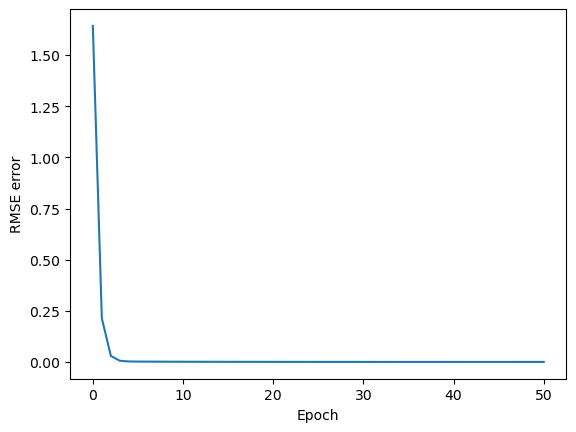

In [8]:
lin_reg = linear_regression(x,y,1)
print('Initial guess w  =' ,lin_reg.w , ', initial guess b  =', lin_reg.b)
print('Actual w   =' ,w , ', actual b   =', b)
lin_reg.full_update(50)
print('Measured w =' ,lin_reg.w , ', measured b =', lin_reg.b)
lin_reg.plot_train()

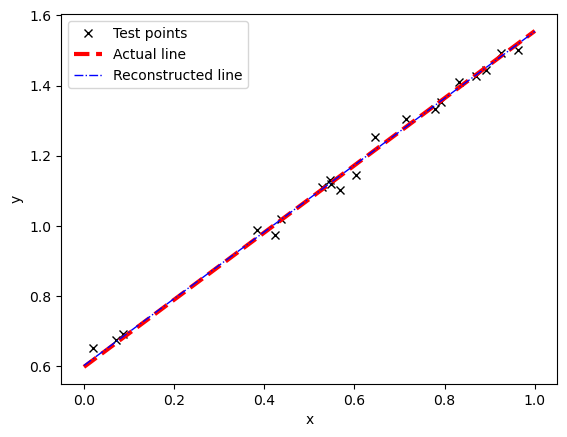

In [9]:
plt.plot(x,y, 'kx', label = 'Test points')
plt.plot([0,1], [b, w+b], 'r--', lw=3, label = 'Actual line')
x_lin = np.array([[0],[1]])
plt.plot(x_lin,lin_reg.calc_y(x_lin), 'b-.', lw=1, label = 'Reconstructed line')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

#### Gradient descent

In [10]:
np.random.seed(0)
x = np.random.rand(100,1)
w = np.random.rand(x.shape[1])
b = np.random.rand(1)
y = np.sum(w*x,axis = 1) + b + np.random.uniform(-0.04,0.04, (x.shape[0]))
lin_reg = linear_regression(x,y,0.1)
w_run = np.array([lin_reg.w[0]]) #
b_run = np.array([lin_reg.b[0]]) # 
for i in range(5000):
    lin_reg.full_update(1)
    w_run=np.append(w_run,lin_reg.w[0])
    b_run=np.append(b_run,lin_reg.b[0])


<IPython.core.display.Javascript object>


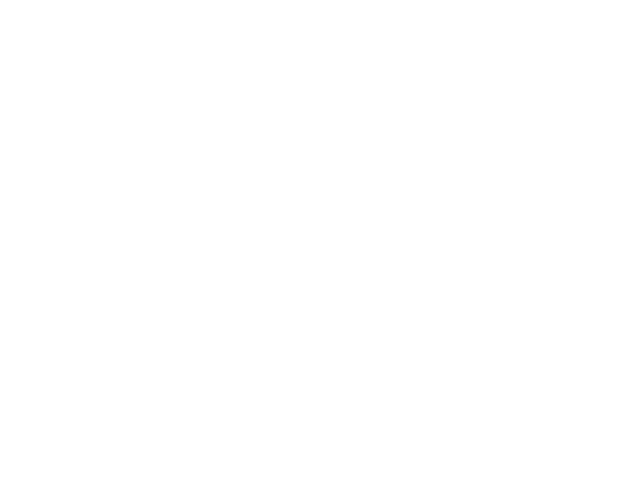

(50, 50)
Surface is the surface of loss function for different weights and biases. The red dot is the starting guess and the blue point is the actual value.


In [11]:
%matplotlib notebook
ax = plt.figure().add_subplot(projection='3d')
dw = (abs(w - w_run)).max()
wlim = [w - dw,w+dw]
db = (abs(b - b_run)).max()
blim = [b - db,b+db]
ww, bb = np.meshgrid(np.linspace(wlim[0],wlim[1],50), np.linspace(blim[0],blim[1],50), sparse=True)
yy = np.mean(np.array([((ww*x[i] + bb) - y[i])**2 for i in range(len(y))]),axis= 0) / 2
print(yy.shape)
ax.plot(w_run, b_run, lin_reg.L_train, c ='k') # , c='k'
ax.scatter(w_run[0], b_run[0], lin_reg.L_train[0], c ='r') # , c='k'
ax.scatter(w, b, 0, c ='b') # , c='k'
ax.plot_surface(ww, bb, yy,cmap ='cool',  alpha=0.25) # 
ax.set_xlabel('$w$'); ax.set_ylabel('$b$'); ax.set_zlabel('$\mathcal{L}$');
ax.legend(['Gradient descent', 'Actual point', 'Actual '])
plt.show()

print('Surface is the surface of loss function for different weights and biases. The red dot is the starting guess and the blue point is the actual value.')


<img src="Learning2.gif" width="1200" align="left">

#### 2D input

In [12]:
%matplotlib inline 
x = np.random.rand(100,2)
w = np.random.rand(x.shape[1])
b = np.random.rand(1)
y = np.sum(w*x,axis = 1) + b + np.random.uniform(-0.04,0.04, (x.shape[0]))

Initial guess w  = [-0.90261941 -0.49271495] , initial guess b  = [-0.10772897]
Actual w   = [0.86948853 0.4541624 ] , actual b   = [0.32670088]
Measured w = [0.87139513 0.44314468] , measured b = [0.33121637]
1001


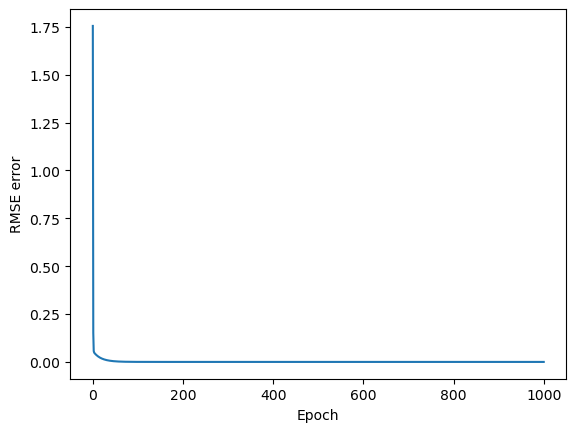

In [13]:
lin_reg = linear_regression(x,y,1)
print('Initial guess w  =' ,lin_reg.w , ', initial guess b  =', lin_reg.b)
print('Actual w   =' ,w , ', actual b   =', b)
lin_reg.full_update(1000)
print('Measured w =' ,lin_reg.w , ', measured b =', lin_reg.b)
lin_reg.plot_train()

<IPython.core.display.Javascript object>


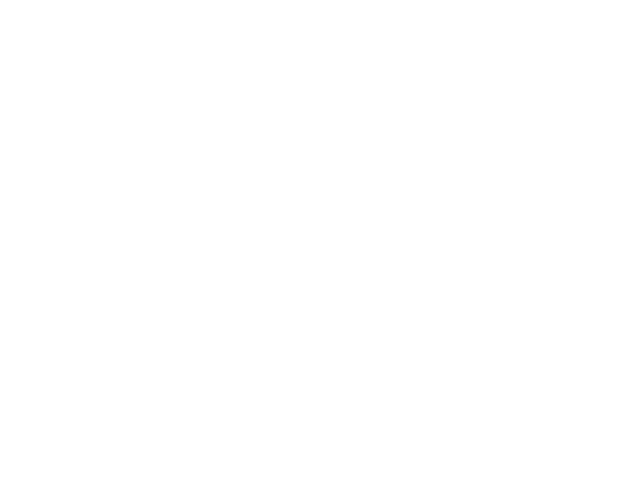

The surface shows the y using the estimated weights and bias from linear regression, the dots are the test set.


In [14]:
%matplotlib notebook
ax = plt.figure().add_subplot(projection='3d')
ax.scatter(x[:,0], x[:,1], y, cmap ='cool') # , c='k'
xx, yy = np.meshgrid(np.linspace(0,1,20), np.linspace(0,1,20), sparse=True)
y_surf = lin_reg.w[0]*xx + lin_reg.w[1]*yy + lin_reg.b 
ax.plot_surface(xx, yy, y_surf,cmap ='cool',  alpha=0.25) # 
ax.set_xlabel('$x_0$'); ax.set_ylabel('$x_1$'); ax.set_zlabel('$y$');
plt.show()
print('The surface shows the y using the estimated weights and bias from linear regression, the dots are the test set.')

Difficult to plot for N > 2.

In [15]:
%matplotlib inline 
x = np.random.rand(1000,10)
w = np.random.rand(x.shape[1])
b = np.random.rand(1)
y = np.sum(w*x,axis = 1) + b + np.random.uniform(-0.04,0.04, (x.shape[0]))

Initial guess w  = [ 0.93529705 -0.13210646 -0.00619871 -0.13778459  0.02074862  0.63073185
  0.7367464  -0.96927137  0.3364736   0.24838923] , initial guess b  = [0.22374118]
Actual w   = [0.10496093 0.0660424  0.38398149 0.9252519  0.22626332 0.42224075
 0.6416878  0.49670186 0.02509595 0.6952865 ] , actual b   = [0.91840767]
Measured w = [0.11470943 0.06653987 0.38534402 0.92965508 0.22860306 0.43158038
 0.64588075 0.50102871 0.02591559 0.69625424] , measured b = [0.89834646]
1001


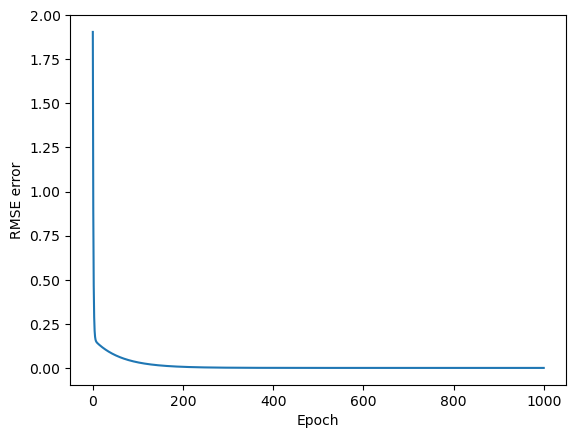

In [16]:
lin_reg = linear_regression(x,y,1)
print('Initial guess w  =' ,lin_reg.w , ', initial guess b  =', lin_reg.b)
print('Actual w   =' ,w , ', actual b   =', b)
lin_reg.full_update(1000)
print('Measured w =' ,lin_reg.w , ', measured b =', lin_reg.b)
lin_reg.plot_train()

#### Real data example?

### General activation function

Linear equation may not accurately model the data try different function... 
\begin{equation}
    \label{eqn:Regression_output}
     y^{(i)} = y(\vec{w}, b; \vec{x}^{(i)}) = f(\vec{w} \cdot \vec{x}^{(i)} + b)= f(z^{(i)})
\end{equation}

Want to find the affects of a small change in the weights and biases on the loss function...
\begin{equation}
    \label{eqn:dLoss_general}
     \Delta\mathcal{L}[Y,\tilde{Y}]\approx \sum_{j=1}^N \frac{\partial \mathcal{L}[Y,\tilde{Y}]}{\partial w_j} \Delta w_j +   \frac{\partial \mathcal{L}[Y,\tilde{Y}]}{\partial b} \Delta b  = 
     \sum_{i=1}^{M}\frac{\partial \mathcal{L}[Y,\tilde{Y}]}{\partial y^{(i)}} \frac{\partial y^{(i)}}{\partial z^{(i)}} \left( \sum_{j=1}^N x_j \Delta w_j +  \Delta b \right) = \sum_{i=1}^{M} \left( \sum_{j=1}^N x_j^{(i)} \Delta w_j +  \Delta b \right)\delta ^{(i)} 
\end{equation}
where $\delta$ is the error function. This will be used more later when we discuss the backpropagation algorthim. It is defined as
\begin{equation}
    \label{eqn:error}
     \delta ^{(i)} =  \frac{\partial\mathcal{L}[Y,\tilde{Y}]}{\partial z^{(i)}} =  \frac{\partial\mathcal{L}[Y,\tilde{Y}]}{\partial y^{(i)}} \frac{\partial y^{(i)}}{\partial z^{(i)}} 
\end{equation}
Choose to change the weights and bias such that the loss function is reduced. Can do this simply by choosing the change in weights and biases to be
\begin{equation}
     \Delta w_j = -\eta  \frac{\partial \mathcal{L}[Y,\tilde{Y}]}{\partial w_j} = -\eta \sum_{i=1}^M x_j^{(i)} \delta^{(i)} \qquad 
     \Delta b = -\eta  \frac{\partial \mathcal{L}[Y,\tilde{Y}]}{\partial b} = -\eta \sum_{i=1}^M \delta^{(i)} 
\end{equation}
such that, for an arbirary small parameter $\eta$, the change in the loss function becomes
\begin{equation}
    \label{eqn:dLoss_general_eta}
\Delta\mathcal{L} \approx   - \left|\frac{\partial \mathcal{L}[Y,\tilde{Y}]}{\partial w_j}\right|^2 \eta - \left|\frac{\partial \mathcal{L}[Y,\tilde{Y}]}{\partial b}\right|^2 \eta = -\sum_{i=1}^{M} \left( \sum_{j=1}^N \left|x_j^{(i)}\right|^2 +  1 \right)\left|\delta ^{(i)}\right|^2\eta .
\end{equation}
This will therefore lead to a smaller loss value. Add diagram of ball rolling down hill, the classic and description of ball rolling down a hill, path of steepest descent ....


In [17]:
class single_node:
    def __init__(self, x, y, eta, activation):
        self.w = np.random.rand(x.shape[1])*2 - 1
        self.b = np.random.rand(1)*2 - 1
        self.x = x
        self.y_test = y
        self.eta = eta
        self.L_train = []
        self.activation = activation
    
    def calc_z(self, x = []):
        if(len(x) == 0): x = self.x
        return np.dot(x, self.w) + self.b

    def calc_y(self, x = []):
        if(len(x) == 0): x = self.x
        if(self.activation == "tanh"):
            y = np.tanh(self.calc_z(x))
        elif(self.activation == "sigmoid"):
            y = 1 / (1 + np.exp(-self.calc_z(x))) 
        else:
            y = self.calc_z(x)
        return y
    
    def calc_dy_dz(self):
        if(self.activation == "tanh"):
            dy_dz = 1 - (self.calc_y()**2.)
        elif(self.activation == "sigmoid"):
            dy_dz = self.calc_y() * (1 - self.calc_y())
        else:
            dy_dz = np.ones_like(self.calc_y())
        return dy_dz
    
    def calc_dL_dy(self):
        return (1/(len(self.w)*len(self.y_test))) * (self.calc_y() - self.y_test)

    def error_function(self):
        return self.calc_dL_dy() * self.calc_dy_dz()
     
    def calc_dz_dw(self):
        return  self.x.T  

    def calc_dz_db(self):
        return 1.

    def calc_L(self): 
        return np.mean((self.calc_y() - self.y_test) ** 2)/2

    def single_update(self):
        #individual update of the weights and biases using gradient descent
        delta = self.error_function()
        dL_dw = np.dot(self.calc_dz_dw() , delta)
        dL_db = np.sum(self.calc_dz_db() * delta)
        self.w -= self.eta*dL_dw#dL_dw should be same shape as w 
        self.b -= self.eta*dL_db
        
    def full_update(self, iterations):
        #full training, repeats process N times
        for i in range(iterations):
            self.single_update()
            self.L_train.append(self.calc_L())
    
    def plot_train(self):
        plt.plot(np.arange(len(self.L_train)),self.L_train)
        plt.xlabel('Epoch')
        plt.ylabel('RMSE error')
        plt.show()

Initial guess w  = [-0.45159346] , initial guess b  = [0.1313823]
Actual w   = [-0.43397619] , actual b   = [-0.3265865]
Measured w = [-0.4303862] , measured b = [-0.3302122]


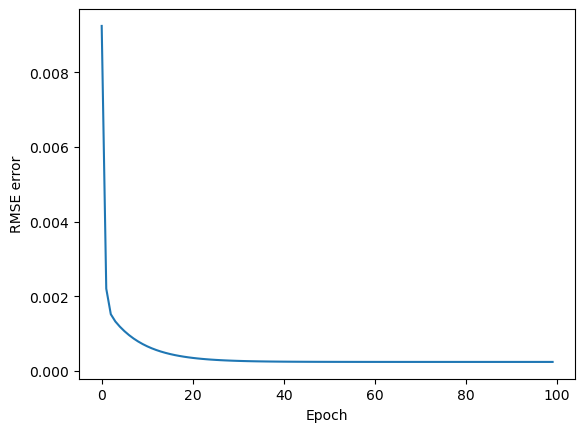

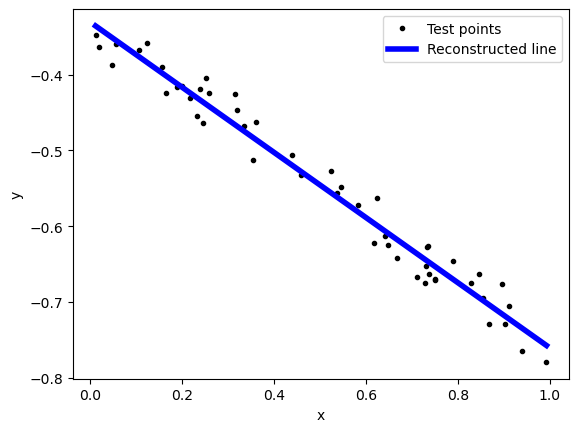

In [18]:
%matplotlib inline 
x = np.random.rand(50,1)#* 16 - 8
w = np.random.rand(x.shape[1]) * 2 -1
b = np.random.rand(1)* 2 -1
z = np.sum(w*x,axis = 1) + b
y = z + np.random.uniform(-0.04,0.04, (x.shape[0]))# np.tanh(z)#(1 / (1 + np.exp(-z)))  # np.random.uniform(-0.0005,0.0005, (x.shape[0]))
node = single_node(x,y,1, "")
print('Initial guess w  =' ,node.w , ', initial guess b  =', node.b)
print('Actual w   =' ,w , ', actual b   =', b)
node.full_update(100)
print('Measured w =' ,node.w , ', measured b =', node.b)
node.plot_train()
plt.plot(x,y, 'k.', label = 'Test points')
x_lin = np.array([np.linspace(x.min(), x.max(), 100)]).T
plt.plot(x_lin,node.calc_y(x_lin), 'b-', lw=4, label = 'Reconstructed line')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

Initial guess w  = [-0.6986829] , initial guess b  = [-0.80465485]
Actual w   = [0.99801323] , actual b   = [0.89593862]
Measured w = [0.99756354] , measured b = [0.8521065]


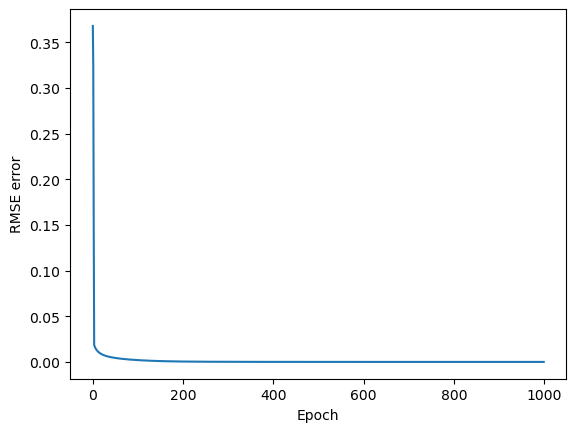

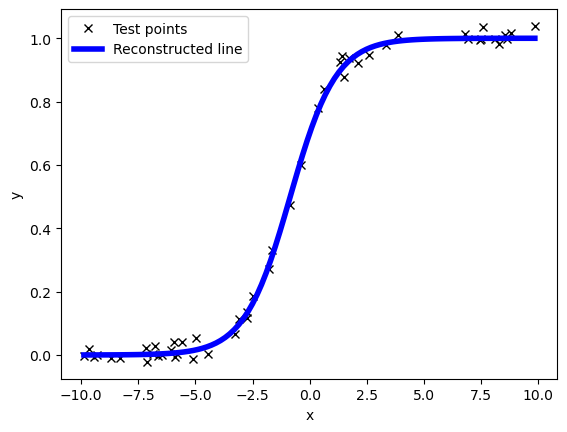

In [19]:
x = np.random.rand(50,1)* 20 - 10
w = np.random.rand(x.shape[1])
b = np.random.rand(1)
z = np.sum(w*x,axis = 1) + b 
y = (1 / (1 + np.exp(-z)))  + np.random.uniform(-0.04,0.04, (x.shape[0])) # np.random.uniform(-0.0005,0.0005, (x.shape[0]))
node = single_node(x,y,1, "sigmoid")
print('Initial guess w  =' ,node.w , ', initial guess b  =', node.b)
print('Actual w   =' ,w , ', actual b   =', b)
node.full_update(1000)
print('Measured w =' ,node.w , ', measured b =', node.b)
node.plot_train()
plt.plot(x,y, 'kx', label = 'Test points')
x_lin = np.array([np.linspace(x.min(), x.max(), 100)]).T
plt.plot(x_lin,node.calc_y(x_lin), 'b-', lw=4, label = 'Reconstructed line')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

Initial guess w  = [0.65078021] , initial guess b  = [-0.22204912]
Actual w   = [0.04784907] , actual b   = [0.14961727]
Measured w = [0.48203721] , measured b = [0.1500648]


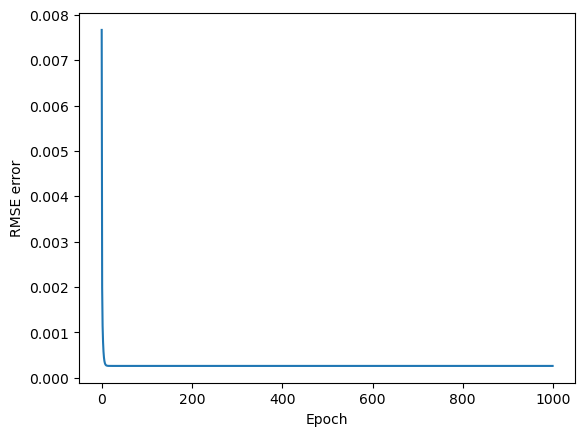

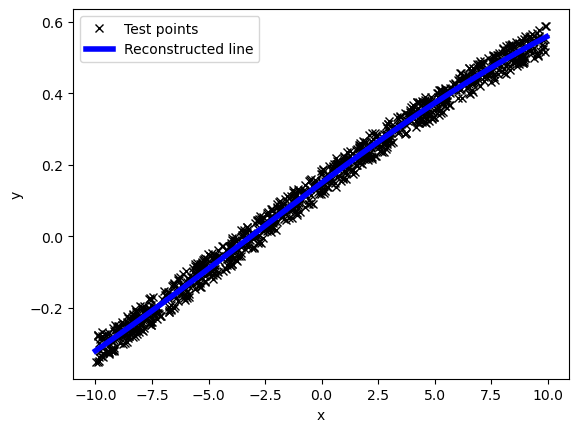

In [20]:
x = np.random.rand(1000,1)* 20 - 10
w = np.random.rand(x.shape[1])
b = np.random.rand(1)
z = np.sum(w*x,axis = 1) + b
y = np.tanh(z) + np.random.uniform(-0.04,0.04, (x.shape[0]))#(1 / (1 + np.exp(-z)))  # np.random.uniform(-0.0005,0.0005, (x.shape[0]))
node = single_node(x / 10,y,1, "tanh")
print('Initial guess w  =' ,node.w , ', initial guess b  =', node.b)
print('Actual w   =' ,w , ', actual b   =', b)
node.full_update(1000)
print('Measured w =' ,node.w , ', measured b =', node.b)
node.plot_train()
plt.plot(x,y, 'kx', label = 'Test points')
x_lin = np.array([np.linspace(x.min(), x.max(), 100)]).T
plt.plot(x_lin,node.calc_y(x_lin / 10), 'b-', lw=4, label = 'Reconstructed line')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

### Examples

Hyperbolic tan loss activtion function.
\begin{equation}
    \label{eqn:tanh}
     f(\vec{w} \cdot \vec{x} + b) = \tanh(\vec{w} \cdot \vec{x} + b); \quad \frac{\partial f(\vec{w} \cdot \vec{x} + b)}{\partial w_j} =x_j(1 - tanh^2(\vec{w} \cdot \vec{x} + b)); \quad \frac{\partial f(\vec{w} \cdot \vec{x} + b)}{\partial b} = (1 - tanh^2(\vec{w} \cdot \vec{x} + b))
\end{equation}
Sigmoid function.
\begin{equation}
    \label{eqn:sigmoid}
      f(x) = \sigma(x) =\frac{1}{1 + e^{-x}}; \quad f'(x) = \sigma'(x) = \frac{e^{-x}}{(1 + e^{-x})^2} = \sigma(x)(1 - \sigma(x));
\end{equation}


Diagram of linear regression thing

## Backpropagation, or how I learned to stop worrying and love the chain rule

In [21]:
net = plot_partial_network(pd.read_csv('classification.csv'))
net.show('mygraph_full_'  + '.html')

## Multiple hidden layers the same but with more indices

In [22]:
net = plot_partial_network(pd.read_csv('hidden.csv'))
net.show('mygraph_full_'  + '.html')

In [23]:
class neural_net:
    def __init__(self,eta, architecture, activation,loss='', l2 = 0):
        self.architecture = architecture 
        self.activation = activation
        self.loss = loss
        if loss == 'cross entropy' and activation[-1] != 'sigmoid': self.loss = ''
        if loss == 'log liklihood' or activation[-1] == 'softmax':
            if not (loss == 'log liklihood' and activation[-1] == 'softmax'):
                self.loss = ''
                self.activation[-1] = 'sigmoid'
                print('This')
        self.num_layers = len(architecture)
        self.w = [(np.random.rand(architecture[i-1], architecture[i]) *2 - 1) for i in range(1, self.num_layers)]
        self.b = [(np.random.rand(architecture[i])*2 - 1) for i in range(1, self.num_layers)]
        self.eta = eta
        self.l2 = l2

    def calc_z(self, a, layer = 1):
        return np.sum(self.w[layer - 1].T * a[layer-1], axis = 1) + self.b[layer - 1] 
   
    def calc_a(self, a, layer = 1):
        if(layer < 1): layer = 1
        if(self.activation[layer] == "tanh"):
            a_layer = np.tanh(self.calc_z(a, layer))
        elif(self.activation[layer] == "sigmoid"):
            a_layer = 1 / (1 + np.exp(-self.calc_z(a , layer))) 
        elif(self.activation[layer] == "softmax"):
            a_layer = np.exp(self.calc_z(a, layer)) / np.sum(np.exp(self.calc_z(a, layer)))
        else:
            a_layer = self.calc_z(a, layer)
        return a_layer
    
    def calc_da_dz(self, a , layer = 1):
        if(layer < 1): layer = 1
        if(self.activation == "tanh"):
            dy_dz = 1 - (self.calc_a(a , layer)**2.)
        elif(self.activation == "sigmoid"):
            dy_dz = self.calc_a(a , layer) * (1 - self.calc_a(a , layer))
        else:
            dy_dz = np.ones_like(self.calc_a(a , layer))
        return dy_dz
    
    def calc_dz_da(self, x , layer = 1):
        return self.w[layer-1]
       
    def calc_dz_dw(self, x):
        return x.T
    
    def calc_dz_db(self, x):
        return np.ones_like(x.T)
    
    def calc_dL_daL(self, aL, y):
        return (aL - y)/len(y)
    
    def calc_L(self, aL, y):
        if self.loss == 'cross entropy':
            return - np.mean(y*np.log(aL) + (1-y)*np.log(1-aL))
        elif self.loss == 'log liklihood':
            return np.mean(-np.log(np.sum(aL *y, axis=1)))
        else:
            return (1/2) * np.mean((aL - y)**2.)

    
    def forward_prop(self, x):
        a = [np.zeros(self.architecture[j]) for j in range(self.num_layers)]
        a[0] = x
        for layer in range(1, self.num_layers): 
            a[layer] = self.calc_a(a, layer)
        return a
    
    def forward_prop_set(self, x):
        output = []
        for sample in range(x.shape[0]):
            output.append(self.forward_prop(x[sample])[-1])
        return np.array(output)
        
    def back_prop(self, a, y):
        delta = [np.zeros(s) for s in self.architecture]
        for end_node in range(self.architecture[-1]):
            if self.loss == 'cross entropy':
                delta[-1] = (self.calc_a(a, self.num_layers -1) - y)
            elif self.loss == 'log liklihood':
                delta[-1] = (self.calc_a(a, self.num_layers -1) - y)
            else:
                delta[-1] = self.calc_dL_daL(a[-1], y) * self.calc_da_dz(a, layer=len(a)-1)
        for layer in range(self.num_layers-2,0, -1):
            delta[layer] = np.sum((self.calc_dz_da(a, layer + 1) * delta[layer + 1]).T *self.calc_da_dz(a , layer),axis=0)
        return delta
    
    def single_epoch(self,training_x, training_y):
        n_samples = training_x.shape[0]
        dw = [np.zeros_like(self.w[i]) for i in range(0, self.num_layers - 1)]
        db = [np.zeros_like(self.b[i]) for i in range(0, self.num_layers - 1)]
        for sample in range(n_samples):
            a = self.forward_prop(training_x[sample])
            delta = self.back_prop(a, training_y[sample])
            for layer in range(1, self.num_layers):
                dw[layer-1] += (np.array([a[layer-1]]).T * delta[layer]) / n_samples
                db[layer-1] += (delta[layer]) / n_samples
        for layer in range(1, self.num_layers):
            self.w[layer-1] = self.w[layer-1]*(1 - (self.eta*self.l2 / n_samples)) - (self.eta * dw[layer-1]) 
            self.b[layer-1] -= self.eta * db[layer-1]#/ n_samples

    def full_training(self, training_x, training_y,testing_x, testing_y, n_epochs):
        L_training = [self.calc_L(self.forward_prop_set(training_x), training_y)]
        L_testing = [self.calc_L(self.forward_prop_set(testing_x), testing_y)]
        for epoch in range(n_epochs):
            self.single_epoch(training_x, training_y)
            L_training.append(self.calc_L(self.forward_prop_set(training_x), training_y))
            L_testing.append(self.calc_L(self.forward_prop_set(testing_x), testing_y))
        return L_training, L_testing
    
    def stochastic_training(self, training_x, training_y,testing_x, testing_y, n_epochs, n_batches, track = False):
        n_training = len(training_x)
        if n_batches > n_training: n_batches = n_training
        if (n_training%n_batches!= 0): n_batches = n_training
        batch_size = int(n_training/n_batches)
        L_training = [self.calc_L(self.forward_prop_set(training_x), training_y)]
        L_testing = [self.calc_L(self.forward_prop_set(testing_x), testing_y)]
        inds = np.arange(n_training)
        w_best = copy.copy(self.w)
        b_best = copy.copy(self.b)
        L_best = L_testing[-1]
        if track: print('Batch size = ', batch_size)
        if track: print('n_batches = ', n_batches)
        for epoch in range(n_epochs):
            if track: print('Epoch',epoch, 'L_testing :', L_testing[-1])
            np.random.shuffle(inds);
            training_x = training_x[inds]; training_y = training_y[inds]
            for n in range(n_batches):
                self.single_epoch(training_x[n*batch_size: (n+1)*batch_size], training_y[n*batch_size: (n+1)*batch_size])
            training_aL = self.forward_prop_set(training_x)
            L_training.append(self.calc_L(training_aL, training_y))
            testing_aL = self.forward_prop_set(testing_x)
            L_testing.append(self.calc_L(testing_aL, testing_y))
            if track: print('Train prob:',100 *(np.floor(training_aL.T /  training_aL.max(axis = 1)).T * training_y).sum() / len(training_aL),'%. Test prob:',100 * (np.floor(testing_aL.T /  testing_aL.max(axis = 1)).T * testing_y).sum() / len(testing_aL),'%')
            if(L_testing[-1] < L_best): 
                w_best = copy.copy(self.w)
                b_best = copy.copy(self.b)
                L_best = L_testing[-1] 
        self.w = w_best
        self.b = b_best
        return L_training, L_testing
            

[array([[-1.7450375 , -0.94708075,  1.17312054, -0.53658645,  1.3460925 ]]), array([[-1.25707219],
       [-0.81785845],
       [ 0.84659375],
       [-0.78811163],
       [ 0.80044751]])]


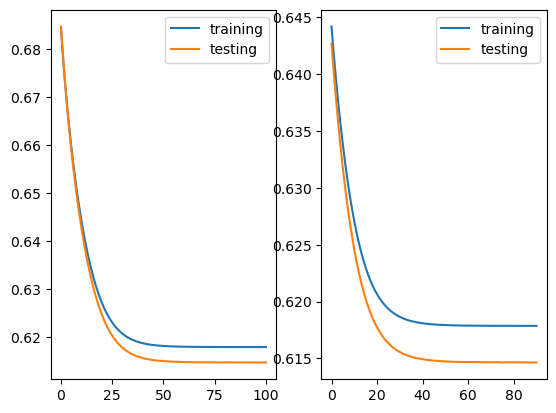

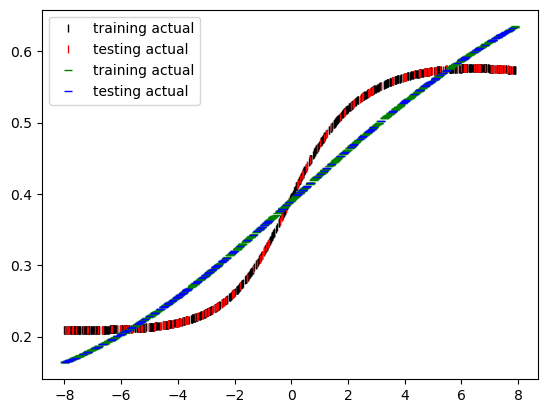

In [24]:
#%reset
%matplotlib inline 
n_samples = 1000
n_batches = 10
n_epochs = 100
test_train_split = 0.8
architecture = [1,3,1]
activation = ['Input', 'tanh', 'sigmoid']
nn_a = neural_net(0.1, architecture, activation)

x = np.random.rand(n_samples,architecture[0]) * 16 -8
y = nn_a.forward_prop_set(x)
inds = np.arange(n_samples)
np.random.shuffle(inds)
training_x = x[inds[:int(n_samples*test_train_split)]]
training_y = y[inds[:int(n_samples*test_train_split)]]
testing_x = x[inds[int(n_samples*test_train_split):]]
testing_y = y[inds[int(n_samples*test_train_split):]]



architecture_b = [1,5,1]
activation_b = ['Input','sigmoid', 'sigmoid']


nn_b = neural_net(0.1, architecture_b, activation_b,'cross entropy',0)
L_training, L_testing = nn_b.stochastic_training(training_x / 8, training_y,testing_x / 8,testing_y , n_epochs, n_batches)

print(nn_b.w)

plt.subplot(1,2,1)
plt.plot(L_training, label = 'training')
plt.plot(L_testing, label = 'testing')
plt.legend()
plt.subplot(1,2,2)
plt.plot(L_training[10:], label = 'training')
plt.plot(L_testing[10:], label = 'testing')
plt.legend()
plt.show()

plt.plot(training_x, training_y, 'k|', label = 'training actual')
plt.plot(testing_x, testing_y, 'r|', label = 'testing actual')
plt.plot(training_x,  nn_b.forward_prop_set(training_x/ 8), 'g_', label = 'training actual')
plt.plot(testing_x,  nn_b.forward_prop_set(testing_x/ 8 ), 'b_', label = 'testing actual')
plt.legend()
plt.show()

## MNIST

In [25]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
n_test = x_test.shape[0]
n_train = x_train.shape[0]

im_width = x_test.shape[1]
im_height = x_test.shape[2]
x_train = x_train.reshape(n_train,im_width*im_height) / 256.
x_test = x_test.reshape(n_test,im_width*im_height) / 256.
y_train = np.array([np.arange(10) == y for y in y_train])
y_test = np.array([np.arange(10) == y for y in y_test])

In [26]:
nn_mnist = neural_net(1, [im_width * im_height,30,10], ['Input', 'sigmoid', 'sigmoid'], 0.01)

For an untrained network
Test set probability : 7.5
[0.19307232 0.84582728 0.01203833 0.90813206 0.92403291 0.05047354
 0.92336989 0.00444422 0.82695923 0.05530892] 4


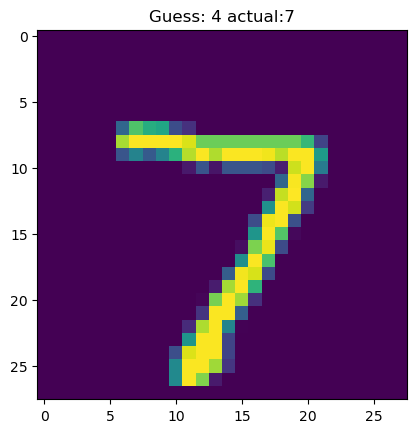

[0.35669393 0.74724488 0.05012977 0.79586645 0.65724512 0.36205446
 0.833449   0.00876556 0.20863422 0.04701367] 6


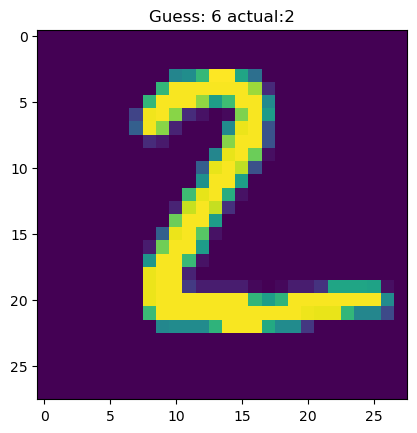

[0.04045496 0.5534313  0.02211903 0.78151073 0.49407484 0.60285005
 0.78956385 0.00557175 0.79528666 0.08686942] 8


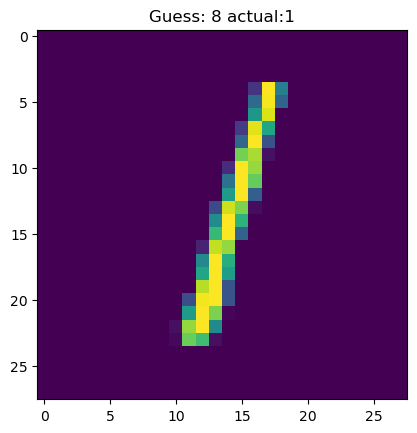

[0.0160519  0.86432021 0.18399066 0.22444619 0.28621965 0.24811831
 0.92861122 0.00398496 0.79495681 0.09274369] 6


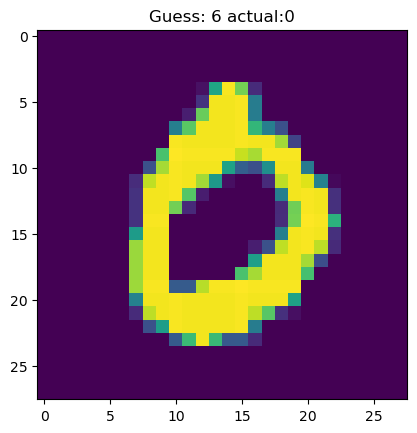

[0.30413527 0.97601142 0.46876    0.63373922 0.54084883 0.2888167
 0.98310761 0.00123824 0.40480313 0.07475273] 6


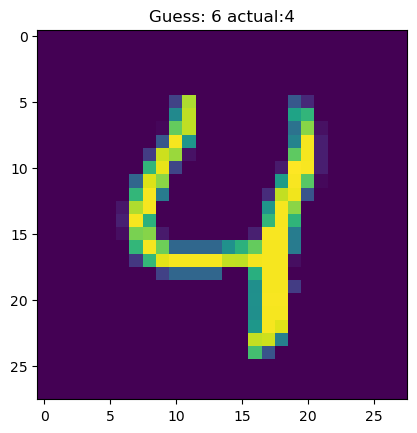

[0.06399266 0.71085709 0.03096112 0.54688408 0.59218153 0.25399602
 0.68183962 0.00316713 0.68750944 0.06584107] 1


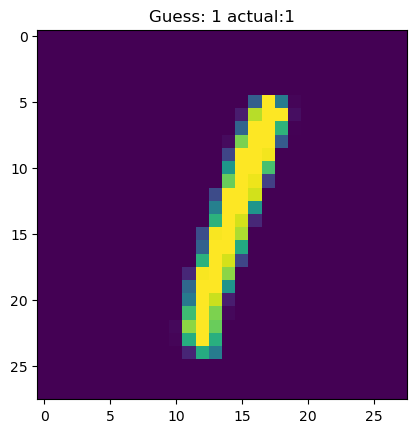

[0.07524539 0.85825429 0.03319077 0.39676656 0.92759213 0.23076289
 0.76572997 0.0485484  0.75753242 0.11453285] 4


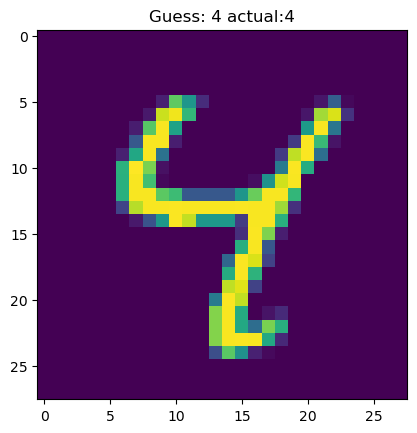

[0.03356971 0.92625807 0.55145013 0.64892507 0.18494067 0.21463618
 0.83883894 0.04223456 0.19819595 0.19368392] 1


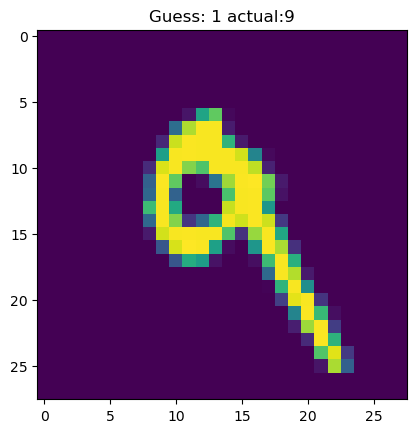

[0.03420718 0.56266294 0.03876857 0.87572458 0.71572641 0.15531299
 0.89653148 0.03707061 0.12136032 0.25236565] 6


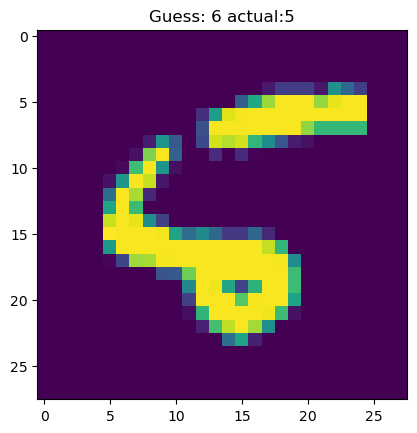

[0.07340233 0.59238443 0.06347416 0.15426715 0.72980321 0.04217257
 0.60473686 0.00215484 0.88750993 0.03149038] 8


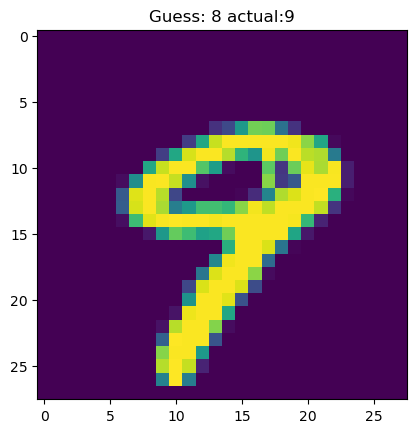

In [27]:
aL_untrained = nn_mnist.forward_prop_set(x_test)
print('For an untrained network')
print('Test set probability :', 100*(np.floor( aL_untrained.T /  aL_untrained.max(axis = 1)).T * y_test).sum() / len(aL_untrained))
for i in range(10):
    plt.imshow(x_test[i].reshape(im_width, im_height))
    print(aL_untrained[i],aL_untrained[i].argmax() )
    plt.title('Guess: ' + str(aL_untrained[i].argmax())+ ' actual:'+ str(y_test[i].argmax()))
    plt.show()

In [28]:
L_training, L_testing = nn_mnist.stochastic_training(x_train, y_train,x_test, y_test, 10, 600, True)

Batch size =  100
n_batches =  600
Epoch 0 L_testing : 0.1356918001992668
Train prob: 80.66166666666666 %. Test prob: 81.2 %
Epoch 1 L_testing : 0.017862659894306517
Train prob: 82.91833333333334 %. Test prob: 83.54 %
Epoch 2 L_testing : 0.014820153600504949
Train prob: 83.88 %. Test prob: 84.55 %
Epoch 3 L_testing : 0.013652349169511259
Train prob: 83.87 %. Test prob: 84.33 %
Epoch 4 L_testing : 0.013492058756635077
Train prob: 83.24166666666666 %. Test prob: 83.54 %
Epoch 5 L_testing : 0.013713482899616831
Train prob: 82.83166666666666 %. Test prob: 83.07 %
Epoch 6 L_testing : 0.01388089204366819
Train prob: 82.58166666666666 %. Test prob: 82.68 %
Epoch 7 L_testing : 0.013848718111199879
Train prob: 83.06333333333333 %. Test prob: 83.5 %
Epoch 8 L_testing : 0.013587164278926383


C:\Users\davem\AppData\Local\Temp\ipykernel_27704\502370370.py:26: RuntimeWarning: overflow encountered in exp
  a_layer = 1 / (1 + np.exp(-self.calc_z(a , layer)))


Train prob: 83.045 %. Test prob: 83.67 %
Epoch 9 L_testing : 0.013391507361457148
Train prob: 83.39333333333333 %. Test prob: 84.05 %


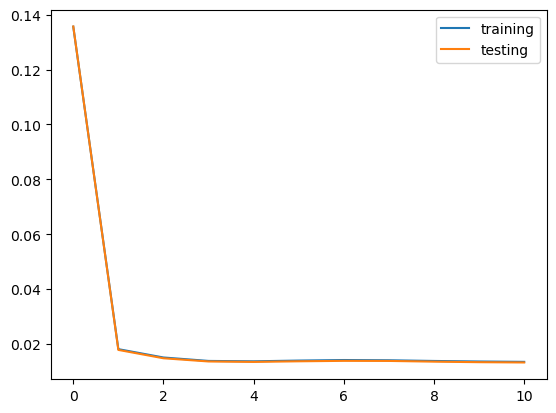

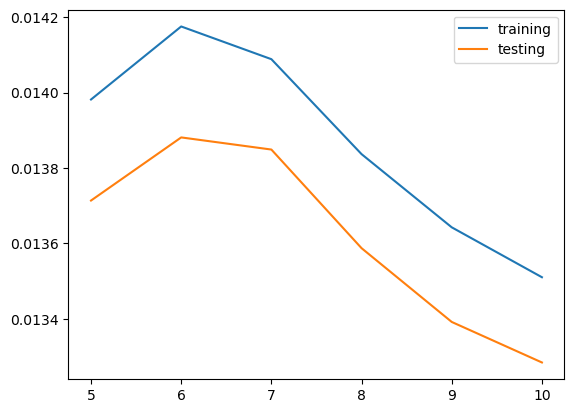

In [29]:
plt.plot(L_training, label = 'training')
plt.plot(L_testing, label = 'testing')
plt.legend()
plt.show()
plt.plot(np.arange(5,len(L_training)),L_training[5:], label = 'training')
plt.plot( np.arange(5,len(L_testing)),L_testing[5:],label = 'testing')
plt.legend()
plt.show()

C:\Users\davem\AppData\Local\Temp\ipykernel_27704\502370370.py:26: RuntimeWarning: overflow encountered in exp
  a_layer = 1 / (1 + np.exp(-self.calc_z(a , layer)))


For a trained network
Test set probability : 84.05 %
[4.48144096e-03 5.98633135e-05 1.57907239e-02 7.66726061e-02
 9.50129697e-05 5.39011409e-03 5.06603197e-07 9.44315886e-01
 2.92128357e-04 2.35051621e-02] 7


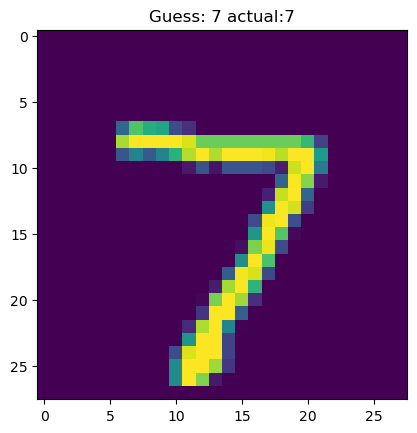

[1.11230559e-02 7.87386664e-03 7.58491661e-01 5.70986484e-01
 1.30320707e-03 6.93783672e-02 1.44805164e-02 8.89518506e-05
 1.64857728e-02 3.00302644e-04] 2


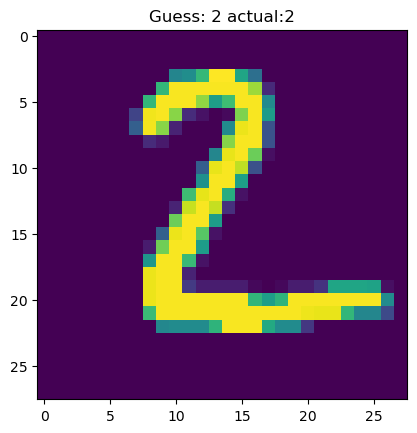

[7.99693459e-07 9.88068111e-01 1.30483706e-02 1.08391928e-02
 2.39603542e-04 1.32259691e-03 9.07965679e-03 6.25503132e-03
 4.32400552e-03 4.10000585e-03] 1


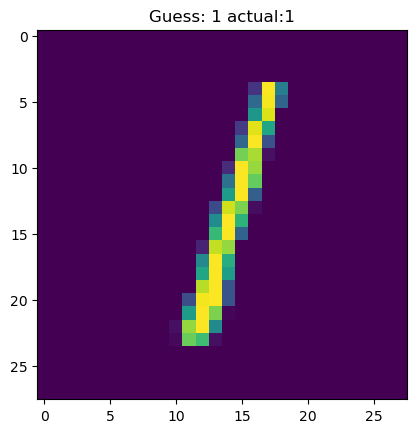

[9.65562583e-01 2.82909450e-05 2.57925684e-03 5.24589814e-03
 8.05050756e-05 2.75573613e-02 1.67421207e-02 8.68835835e-03
 5.45333212e-04 1.20012370e-02] 0


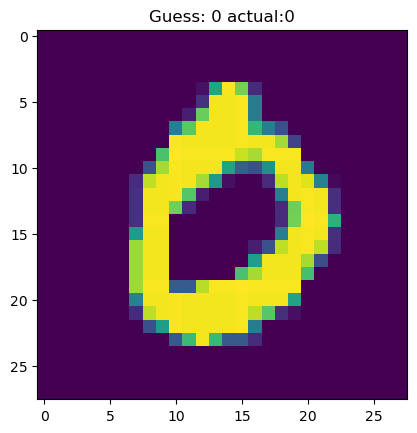

[4.31792786e-04 2.30382934e-03 2.16626020e-01 6.17575428e-04
 9.63446281e-01 8.03239039e-04 5.09105637e-03 2.04435297e-02
 1.66436453e-02 3.06483440e-02] 4


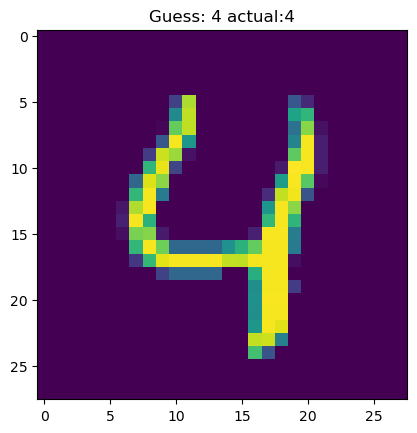

[1.07178352e-06 9.94758680e-01 2.08829264e-03 8.87979915e-03
 4.69634481e-03 2.09668680e-03 1.10504511e-04 5.24268756e-03
 4.70137064e-03 2.01938086e-02] 1


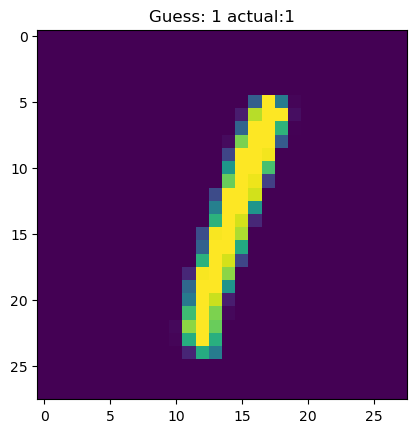

[1.17074044e-04 8.61313112e-04 2.39023090e-05 5.99774925e-04
 8.51880306e-01 3.14063185e-01 2.52487349e-04 9.23406984e-03
 9.86199092e-02 9.53012356e-02] 4


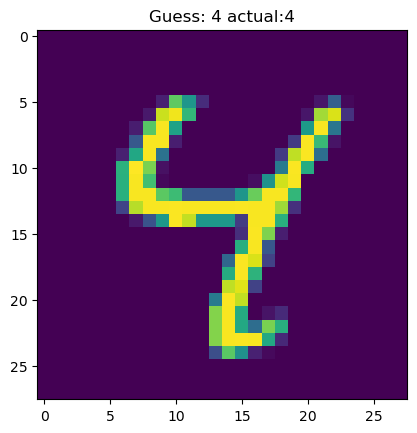

[3.13107556e-05 8.89019299e-03 4.00590710e-04 7.66885801e-04
 1.47219390e-01 7.36212122e-03 9.85572323e-03 1.15487513e-03
 2.13114888e-03 9.59975860e-01] 9


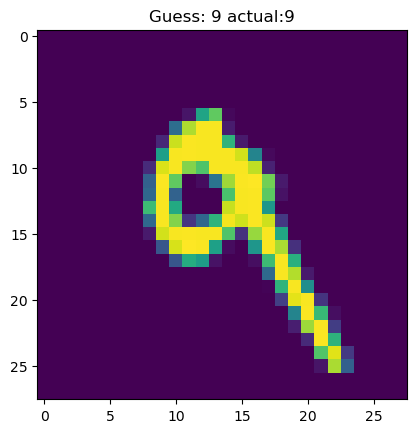

[2.58518727e-03 3.79433343e-03 1.67534852e-01 1.42053538e-05
 8.82719067e-03 7.28360023e-03 8.33225414e-01 3.84353983e-04
 3.67379311e-03 1.07763232e-03] 6


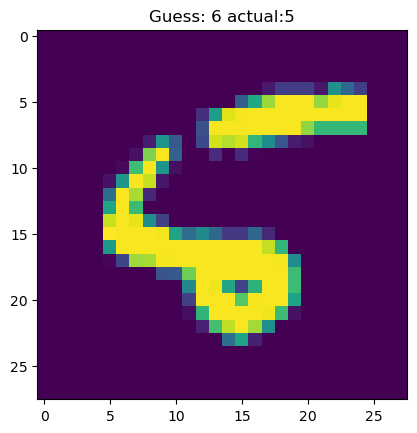

[1.17005108e-03 1.48648953e-03 2.03655993e-04 1.12420942e-05
 4.72098170e-02 1.13261482e-03 1.82785814e-02 1.46360291e-01
 1.60179486e-03 8.61813581e-01] 9


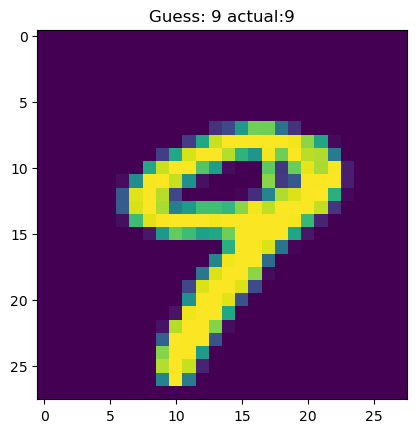

[8.22473350e-01 2.55142725e-04 2.68377842e-02 1.26624302e-02
 1.18501493e-03 6.43819852e-02 1.71442885e-02 8.63175154e-03
 5.92420197e-02 1.31089939e-04] 0


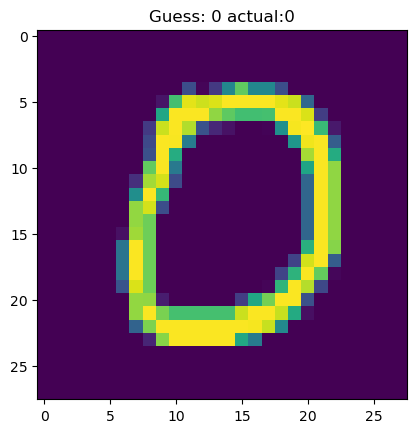

[2.34726643e-02 5.14595429e-03 3.92131364e-02 2.14013211e-04
 1.93293888e-03 3.57064204e-03 9.11988303e-01 1.43075262e-03
 1.51421899e-02 2.13557857e-03] 6


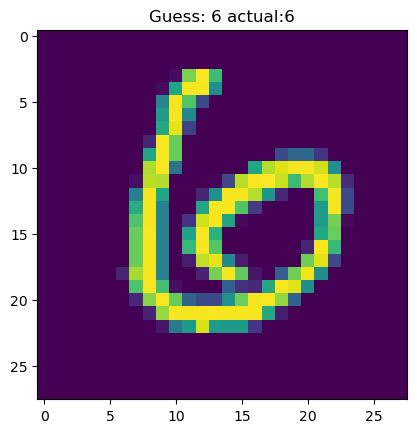

[3.04742908e-02 5.79124762e-04 3.38242765e-03 1.12475262e-03
 3.87134338e-02 5.29169857e-04 7.37630310e-03 1.40547821e-01
 4.04449239e-03 9.00302475e-01] 9


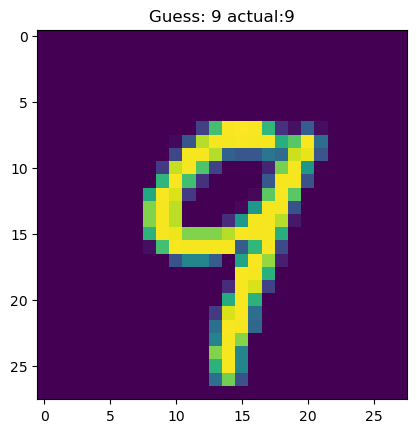

[9.55081173e-01 4.99355760e-05 7.82214150e-03 6.44051363e-03
 2.00256943e-04 1.86997422e-01 1.66391291e-03 3.90221067e-02
 3.59409222e-02 7.42966705e-03] 0


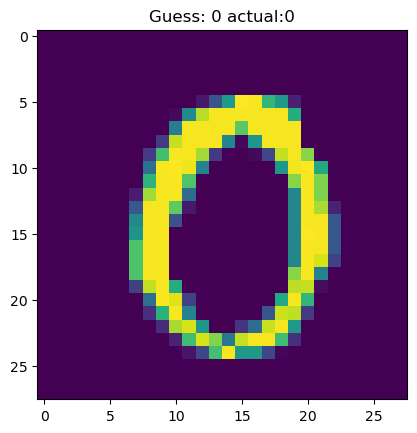

[7.69684268e-07 9.88026427e-01 1.28712472e-02 1.12614434e-02
 2.32813056e-04 1.41734917e-03 9.22533057e-03 6.00415303e-03
 4.55020014e-03 4.20868328e-03] 1


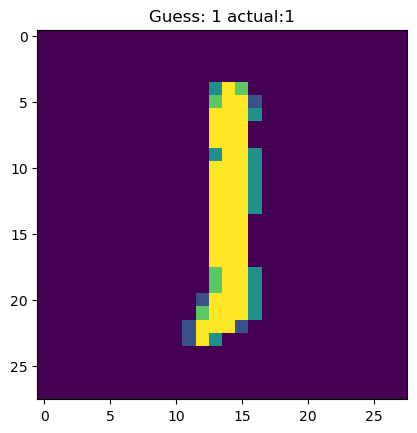

[3.11748812e-03 1.32227276e-02 2.03882008e-02 3.67690783e-01
 1.15569129e-03 5.14777370e-01 7.69750263e-03 4.89726221e-05
 2.25859267e-01 1.73786417e-04] 5


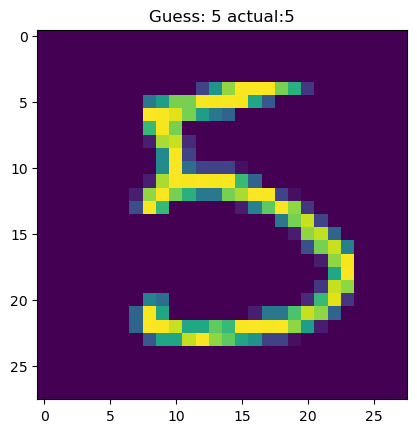

[3.32096363e-02 6.24740055e-04 5.34990283e-03 1.12637877e-03
 4.34382335e-02 4.88412858e-04 6.22046935e-03 1.40130851e-01
 4.14386430e-03 8.83274473e-01] 9


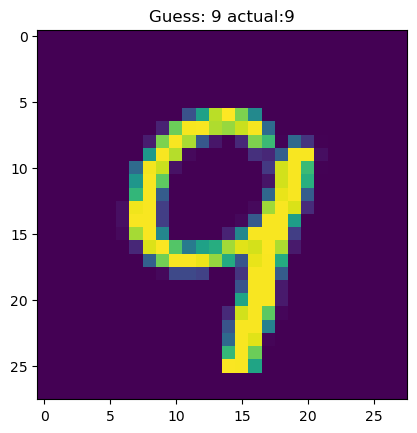

[1.35822262e-02 2.33166497e-05 8.14317056e-04 8.88168681e-02
 1.40199038e-04 4.61205567e-03 6.60349086e-06 7.00131024e-01
 1.32126614e-03 5.89148534e-02] 7


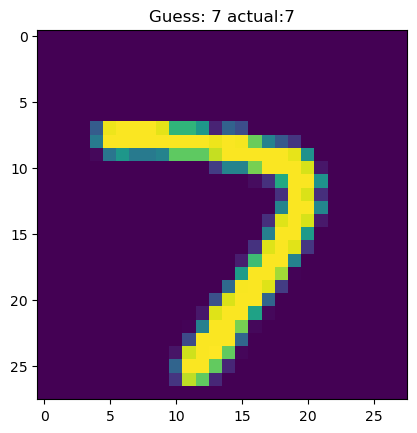

[1.14179213e-03 7.00917399e-03 1.87539656e-02 5.91141496e-01
 7.36495815e-03 1.58881103e-01 4.17471494e-02 1.39221133e-05
 2.00604186e-02 1.46443031e-04] 3


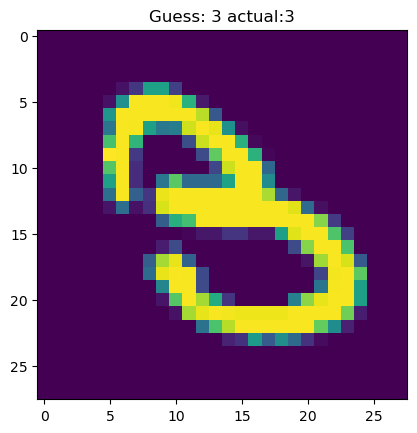

[5.81502407e-04 1.63258987e-04 1.52107132e-02 2.07041014e-02
 9.94236470e-01 2.88254910e-03 6.55624927e-04 8.53277615e-03
 8.74328969e-04 3.95624633e-03] 4


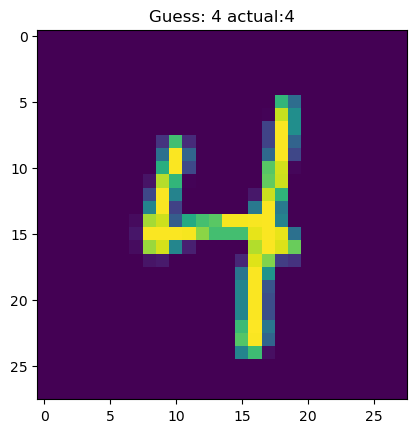

In [30]:
aL_test = nn_mnist.forward_prop_set(x_test)
print('For a trained network')
print('Test set probability :', 100*(np.floor( aL_test.T /  aL_test.max(axis = 1)).T * y_test).sum() / len(aL_test), '%')
for i in range(20):
    plt.imshow(x_test[i].reshape(im_width, im_height))
    print(aL_test[i],aL_test[i].argmax() )
    plt.title('Guess: ' + str(aL_test[i].argmax())+  ' actual:'+ str(y_test[i].argmax()))
    plt.show()


In [31]:
nn_mnist_2 = neural_net(1, [im_width * im_height,25,10], ['Input', 'tanh', 'sigmoid'],'', 0.01)

In [32]:
L_training, L_testing = nn_mnist_2.stochastic_training(x_train, y_train,x_test, y_test, 10, 600, True)

Batch size =  100
n_batches =  600
Epoch 0 L_testing : 0.20719360265740494
Train prob: 81.04666666666667 %. Test prob: 81.1 %
Epoch 1 L_testing : 0.015414074985353217
Train prob: 82.47 %. Test prob: 83.01 %
Epoch 2 L_testing : 0.014074032611198092
Train prob: 83.60333333333334 %. Test prob: 84.24 %
Epoch 3 L_testing : 0.013481019487769001
Train prob: 83.54833333333333 %. Test prob: 83.68 %
Epoch 4 L_testing : 0.013457396027138616
Train prob: 82.94 %. Test prob: 82.85 %
Epoch 5 L_testing : 0.013731063105260989
Train prob: 82.70666666666666 %. Test prob: 82.98 %
Epoch 6 L_testing : 0.014237124872011753
Train prob: 82.49166666666666 %. Test prob: 83.0 %
Epoch 7 L_testing : 0.014567003561686004
Train prob: 81.805 %. Test prob: 81.9 %
Epoch 8 L_testing : 0.014864059295145442
Train prob: 81.53833333333333 %. Test prob: 81.73 %
Epoch 9 L_testing : 0.014864322372368231
Train prob: 82.565 %. Test prob: 82.92 %


For a trained network
Test set probability : 82.41 %
[1.12298630e-02 3.12966439e-05 6.94096515e-04 2.20378241e-02
 4.35969684e-04 6.12267378e-03 2.69025204e-05 7.43175530e-01
 6.57012092e-04 1.38587734e-02] 7


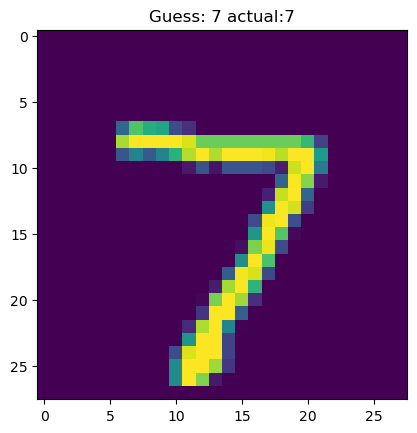

[1.47367145e-01 7.56511614e-04 1.23482519e-01 4.56877640e-02
 1.85013604e-04 2.85915438e-02 8.26313276e-02 2.74843840e-05
 3.32788453e-04 3.73356712e-04] 0


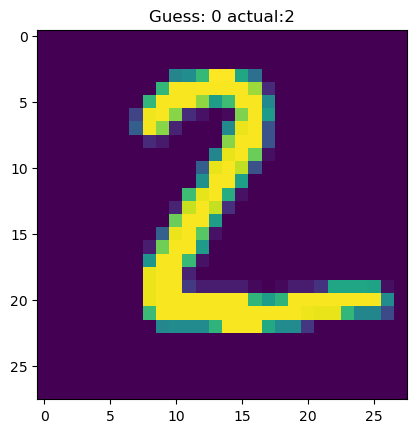

[2.58557987e-04 9.78870945e-01 2.14190109e-03 8.84182136e-03
 4.79616279e-05 6.96506910e-04 1.87832976e-04 6.74693225e-02
 1.49377082e-03 3.93140017e-04] 1


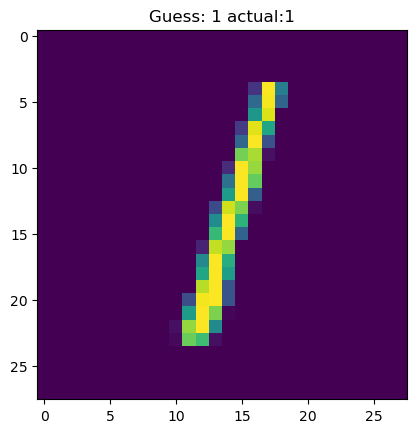

[6.66778546e-01 1.06451243e-05 6.73705204e-04 4.66465143e-04
 1.39057438e-04 3.01211060e-02 8.18700465e-04 1.00080006e-01
 1.90400780e-04 3.61127950e-03] 0


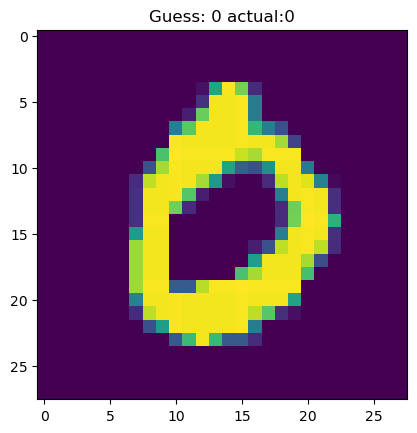

[1.74728888e-03 3.49056496e-06 5.54794778e-03 1.10417378e-04
 9.65639449e-01 7.31264926e-03 7.64581571e-03 9.75122932e-04
 1.23644586e-04 3.41690941e-03] 4


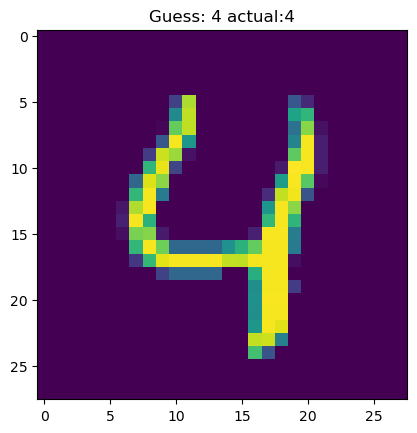

[2.30018306e-04 9.79588105e-01 1.63945377e-03 1.12513097e-02
 5.75376591e-05 6.09821399e-04 1.41962473e-04 9.67823852e-02
 1.26382712e-03 3.32336630e-04] 1


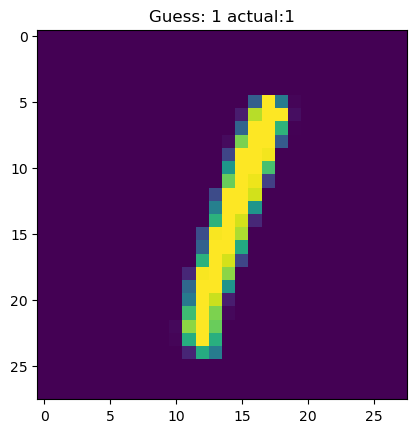

[1.04843491e-05 8.07560055e-04 3.17148498e-06 1.84307263e-02
 3.05981221e-01 6.73061279e-02 3.15914602e-04 1.41096331e-02
 4.48599513e-03 1.11919853e-02] 4


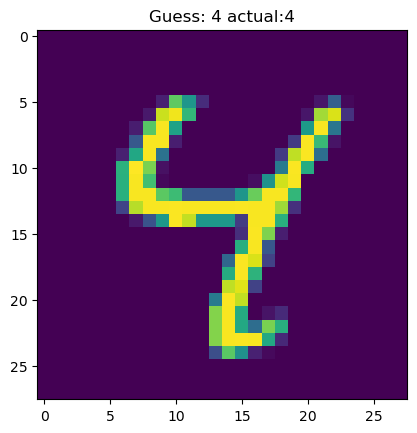

[1.69352961e-05 2.09673501e-04 4.60440618e-04 1.72471772e-02
 5.71819547e-02 2.42784357e-02 1.07968074e-03 6.31561338e-04
 2.41289746e-02 5.87830640e-01] 9


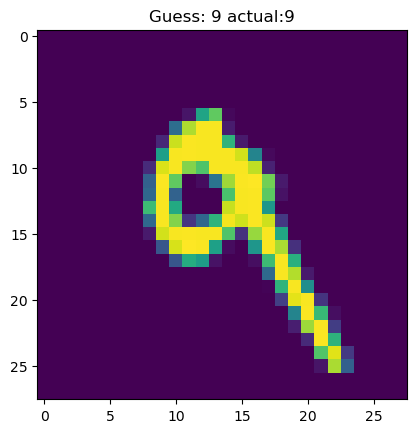

[9.80932794e-04 1.79220504e-04 8.15205570e-02 3.78944079e-06
 2.08785840e-01 6.40292465e-04 3.33556872e-01 1.38785825e-03
 2.02393439e-04 1.61782741e-02] 6


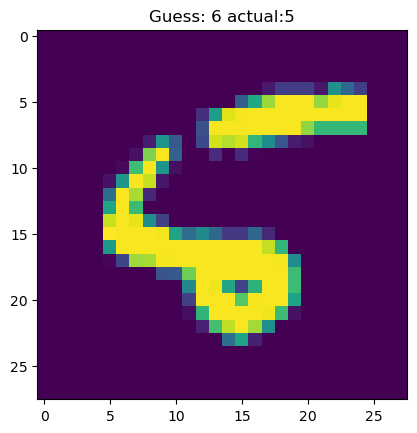

[4.89661653e-04 8.98614049e-06 1.48484995e-05 1.18029519e-03
 6.21324252e-02 4.83227526e-03 1.22313550e-04 4.99925562e-01
 1.30261020e-03 4.00551793e-01] 7


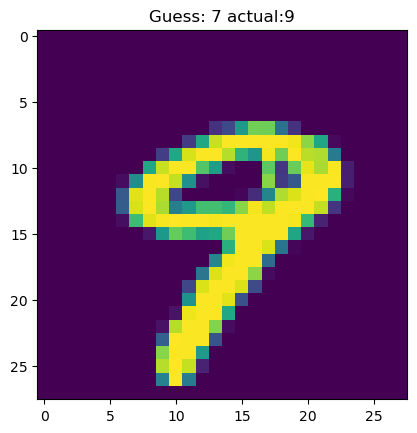

[9.05066586e-01 1.51293085e-04 7.32207602e-03 2.09978708e-03
 2.44330619e-04 8.64536145e-02 3.47265266e-04 4.74188246e-04
 5.78796731e-03 1.45495876e-03] 0


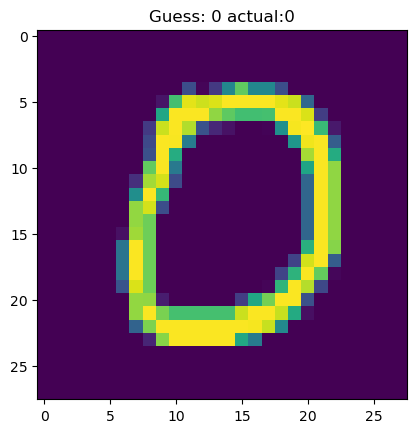

[0.00246001 0.00543285 0.10574176 0.03779847 0.00474036 0.00176133
 0.04964789 0.00013823 0.01156497 0.0009101 ] 2


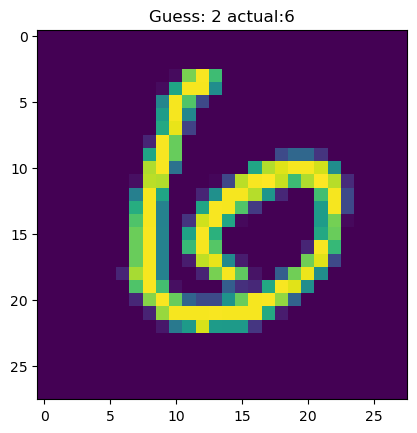

[3.99211680e-04 3.40691609e-06 1.73015399e-04 3.34832653e-04
 2.46504374e-02 5.21823311e-02 1.54443181e-04 4.54863284e-02
 5.43787306e-03 7.60997953e-01] 9


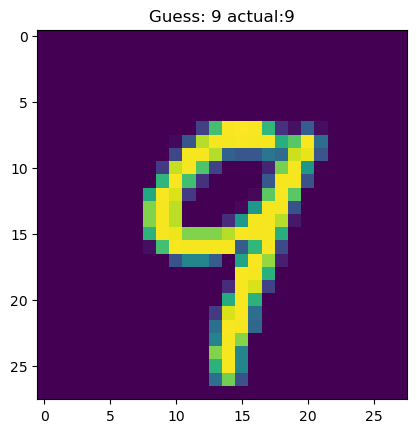

[9.00820149e-01 1.95859967e-05 1.00413793e-02 3.62630328e-04
 4.75798092e-04 4.03414186e-02 1.19261083e-04 3.47994011e-03
 1.23351679e-03 4.48994101e-03] 0


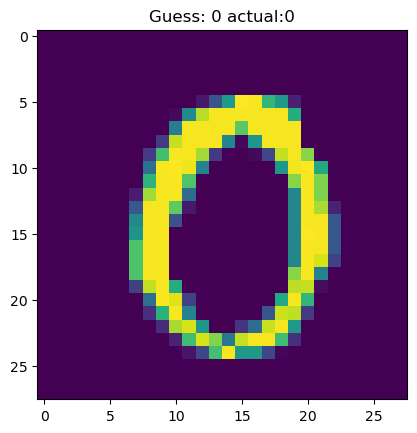

[6.33747261e-04 9.86483002e-01 6.62575320e-03 1.66513129e-02
 1.82041799e-06 6.76237280e-03 1.28280110e-03 1.14846034e-03
 5.58218115e-04 1.75409634e-03] 1


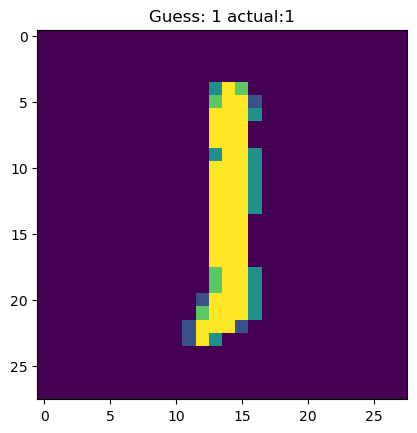

[8.53688323e-03 2.58648564e-04 5.61887179e-04 1.43764987e-01
 2.01554662e-03 5.69690656e-01 8.29397938e-05 1.45580250e-03
 1.24871689e-03 3.04143399e-04] 5


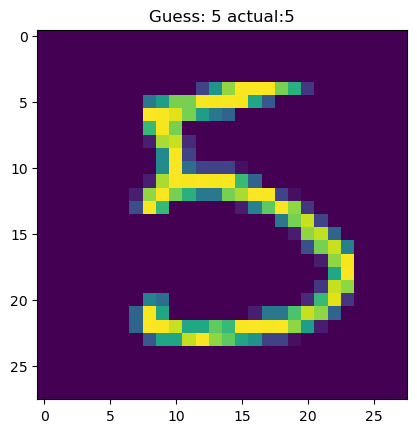

[7.34852997e-04 7.89155397e-06 7.71332818e-04 1.17937142e-03
 7.59986178e-03 1.97507335e-03 2.87582083e-03 5.61131115e-02
 6.58810687e-03 8.03238356e-01] 9


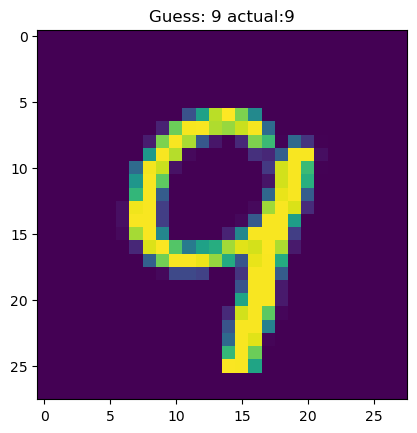

[4.54221361e-03 5.11349345e-05 8.05547943e-04 8.94443254e-02
 2.14608770e-04 7.77941579e-04 1.08219531e-03 9.36561428e-01
 2.61002724e-04 1.81551029e-03] 7


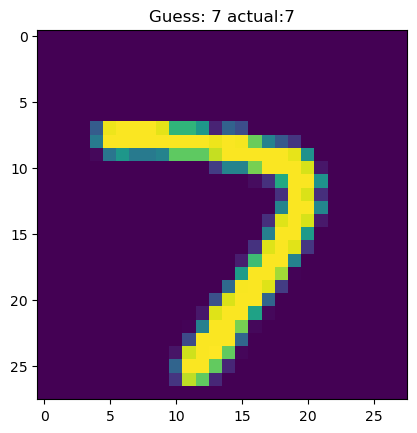

[5.22617362e-05 1.44667619e-03 1.55815575e-03 1.58157053e-01
 6.39959675e-04 3.41673691e-01 1.18858862e-02 2.36137293e-05
 1.82130956e-02 1.93609979e-02] 5


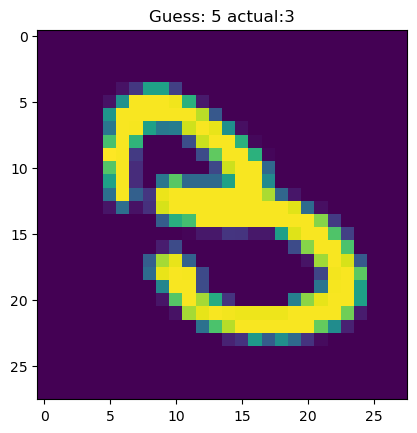

[6.16187867e-06 1.51124140e-04 1.98418936e-04 6.70755381e-04
 9.78072987e-01 1.44748701e-02 8.02928597e-04 1.41989393e-03
 8.52172295e-04 9.76621937e-03] 4


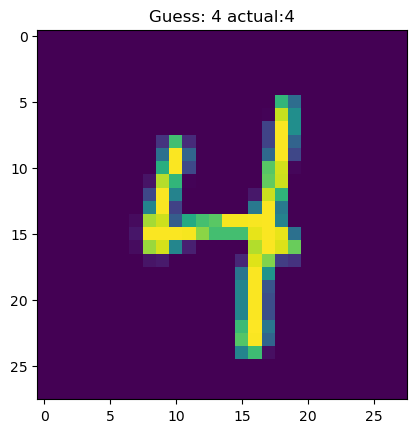

In [33]:
aL_test = nn_mnist_2.forward_prop_set(x_test)
print('For a trained network')
print('Test set probability :', 100*(np.floor( aL_test.T /  aL_test.max(axis = 1)).T * y_test).sum() / len(aL_test), '%')
for i in range(20):
    plt.imshow(x_test[i].reshape(im_width, im_height))
    print(aL_test[i],aL_test[i].argmax() )
    plt.title('Guess: ' + str(aL_test[i].argmax())+  ' actual:'+ str(y_test[i].argmax()))
    plt.show()

In [34]:
nn_mnist_3 = neural_net(0.1, [im_width * im_height,25,10], ['Input', 'tanh', 'sigmoid'],'cross entropy', 0)

In [35]:
nn_mnist_3.eta = 0.1
L_training, L_testing = nn_mnist_3.stochastic_training(x_train, y_train,x_test, y_test, 10, 600, True)

Batch size =  100
n_batches =  600
Epoch 0 L_testing : 1.0677980762619057
Train prob: 81.35666666666667 %. Test prob: 81.96 %
Epoch 1 L_testing : 0.12103233397652766
Train prob: 82.09333333333333 %. Test prob: 82.89 %
Epoch 2 L_testing : 0.10693651345462188
Train prob: 83.54833333333333 %. Test prob: 83.99 %
Epoch 3 L_testing : 0.09810653274737485
Train prob: 83.63833333333334 %. Test prob: 84.07 %
Epoch 4 L_testing : 0.0973572567640632
Train prob: 84.05 %. Test prob: 84.45 %
Epoch 5 L_testing : 0.09576458576971074
Train prob: 83.45333333333333 %. Test prob: 83.52 %
Epoch 6 L_testing : 0.09828476903218818
Train prob: 82.865 %. Test prob: 82.91 %
Epoch 7 L_testing : 0.09935268635243139
Train prob: 82.53 %. Test prob: 82.44 %
Epoch 8 L_testing : 0.10124100204746708
Train prob: 82.64 %. Test prob: 83.0 %
Epoch 9 L_testing : 0.10018303140965316
Train prob: 82.46833333333333 %. Test prob: 82.85 %


For a trained network
Test set probability : 84.7 %
[8.55567433e-04 1.85630696e-03 1.58810799e-03 2.11250858e-02
 1.31978330e-04 7.87034143e-05 7.93978766e-07 9.94607803e-01
 1.02641051e-04 1.30087130e-02] 7


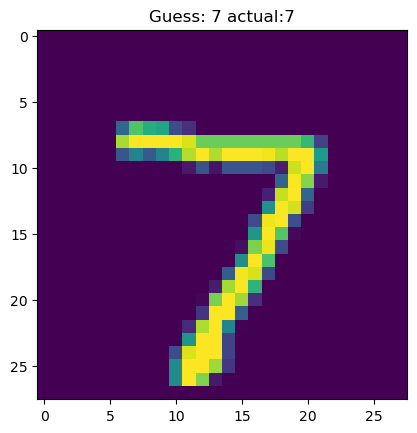

[3.88380919e-01 3.22297837e-02 8.64947636e-01 6.00943365e-03
 5.57387543e-06 2.81014762e-01 1.43521820e-01 9.64334106e-06
 6.87387721e-02 2.70191484e-03] 2


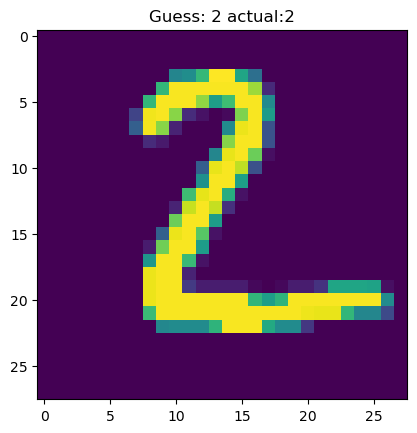

[3.53223818e-07 9.91640560e-01 7.44136652e-03 1.55880076e-03
 1.18379506e-06 5.47797479e-03 2.18806267e-03 4.97028863e-03
 4.81510136e-04 1.94630553e-04] 1


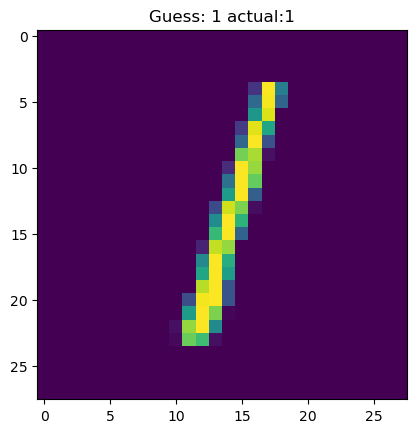

[9.67639390e-01 9.30577151e-05 1.08261756e-04 1.93187870e-03
 3.22606895e-04 1.32690629e-01 3.99082475e-04 2.57686540e-03
 2.02229879e-04 1.12874164e-04] 0


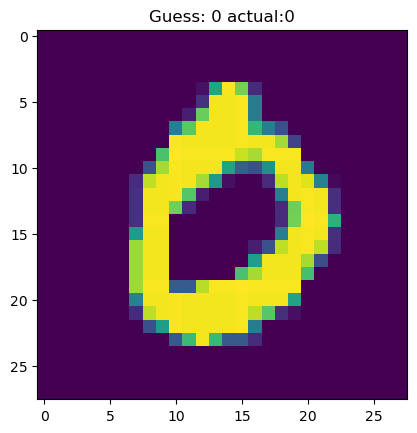

[4.09642761e-03 4.28707704e-05 1.98577936e-03 5.26696016e-04
 9.55327582e-01 6.60452761e-03 2.50935685e-03 4.22382379e-03
 2.54469068e-03 1.29323841e-02] 4


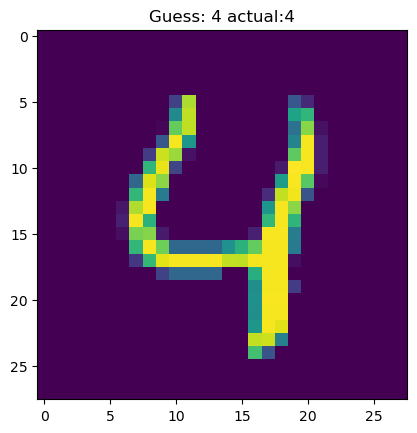

[1.23214421e-06 9.94301618e-01 4.55792441e-04 5.32969216e-03
 1.71294165e-05 1.39879337e-02 6.21253613e-05 4.66027829e-03
 3.74497134e-03 7.65136199e-04] 1


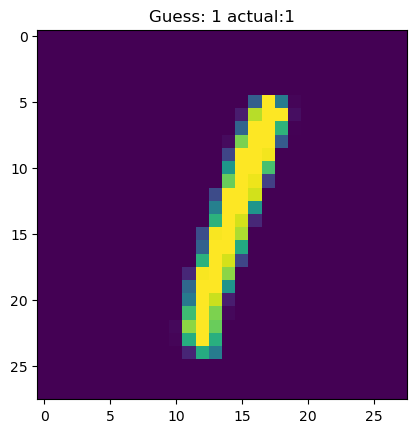

[3.28821917e-04 7.52703305e-06 2.65919764e-05 9.47780666e-04
 9.29885743e-01 9.96600827e-02 4.45989586e-04 1.90532354e-02
 8.00491520e-04 5.28550764e-02] 4


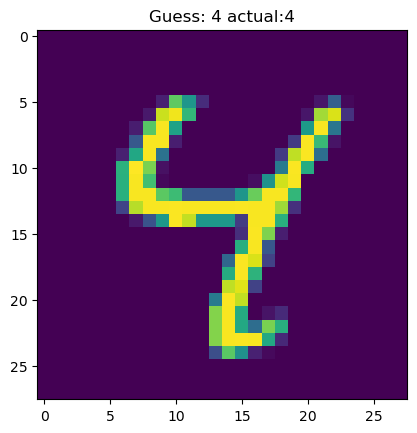

[1.43212373e-06 2.25417968e-03 5.76878024e-04 5.24573466e-03
 1.86996334e-01 6.13986412e-03 1.10679165e-03 7.22952729e-03
 1.84566805e-02 7.12186775e-01] 9


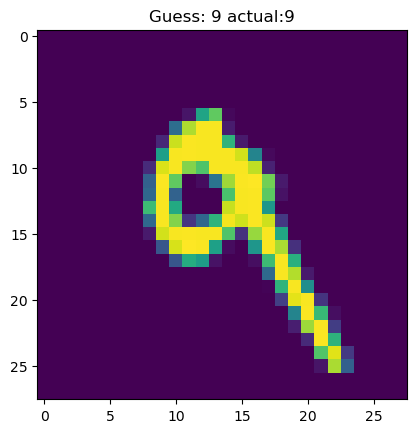

[1.88574024e-03 4.30310318e-05 1.08508286e-01 4.49556309e-03
 3.60219996e-02 8.37860782e-03 6.08728885e-01 3.43120978e-04
 9.22213864e-03 3.69781433e-03] 6


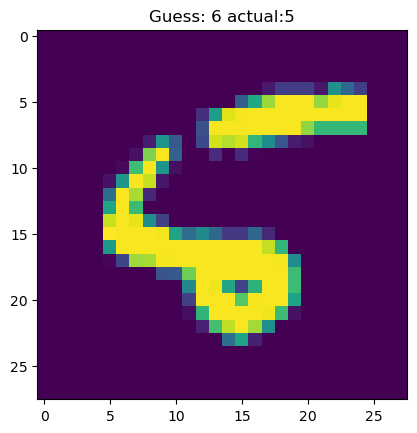

[2.12562737e-03 1.28447415e-05 7.04525556e-05 6.26681984e-04
 5.63560835e-02 6.24406525e-03 3.05482247e-03 1.91971427e-01
 1.05584979e-03 3.25897101e-01] 9


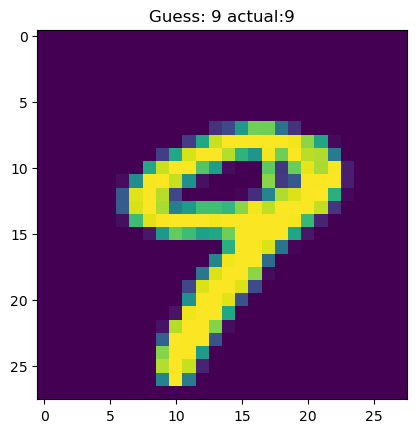

[9.18992200e-01 9.15246914e-04 5.17127466e-04 3.63204050e-03
 9.69654155e-04 4.54139977e-02 3.62795952e-03 1.56370213e-03
 1.26546737e-03 2.06140592e-05] 0


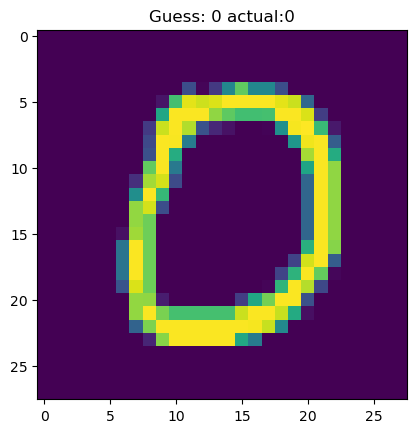

[9.80501061e-03 3.03296758e-04 1.32243022e-02 2.38282787e-02
 9.80454570e-02 3.15802039e-02 4.93097991e-02 4.08607460e-05
 4.00278283e-02 4.30124769e-03] 4


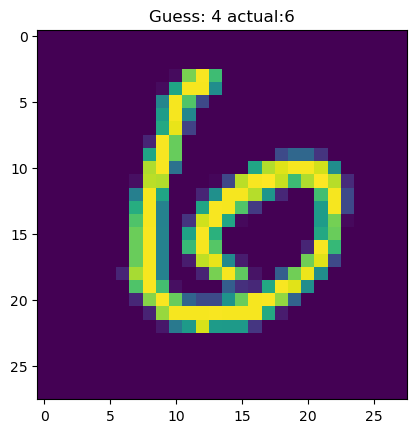

[6.19080384e-04 3.80028554e-05 4.34332212e-04 8.56036337e-05
 2.10820836e-01 2.32042571e-03 8.43954644e-05 5.82674481e-02
 2.66151678e-04 7.52198823e-01] 9


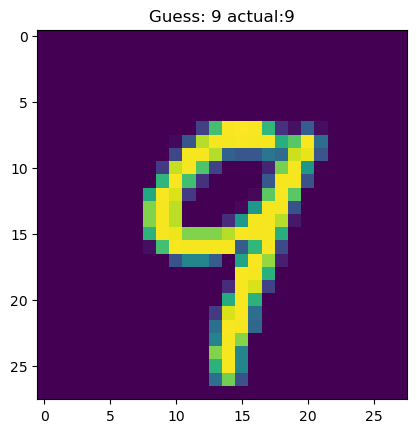

[9.12750850e-01 2.56414003e-05 2.30698693e-04 5.86005336e-04
 1.05556856e-02 1.84116515e-02 1.25665535e-03 4.86496475e-02
 1.67614945e-02 2.32169463e-03] 0


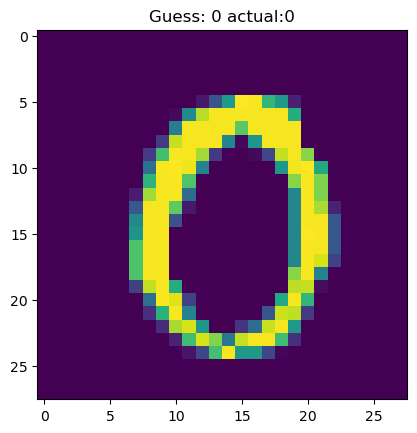

[6.43181320e-07 9.37616839e-01 2.70460237e-03 3.91745455e-03
 7.15010050e-07 2.18703150e-02 6.41950721e-04 4.38664107e-03
 3.62474892e-03 7.08801705e-04] 1


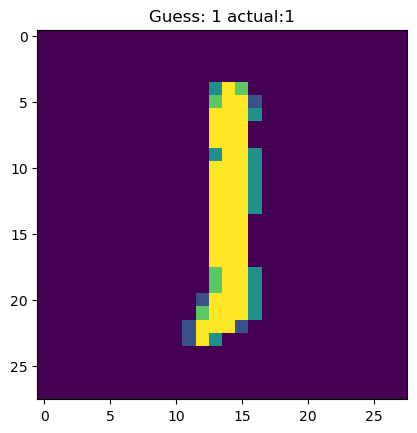

[1.49667092e-04 3.39059874e-02 7.62752032e-04 2.95090138e-01
 6.42523775e-05 5.32244312e-01 2.07327124e-05 7.67761646e-05
 2.80556943e-02 1.27548357e-04] 5


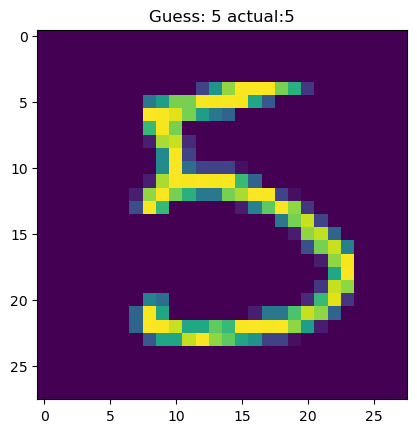

[2.69733451e-03 1.32186822e-05 5.10411604e-03 7.89143533e-04
 6.78642769e-03 3.30472670e-03 3.53886792e-05 1.24321264e-01
 1.83491941e-03 6.99216026e-01] 9


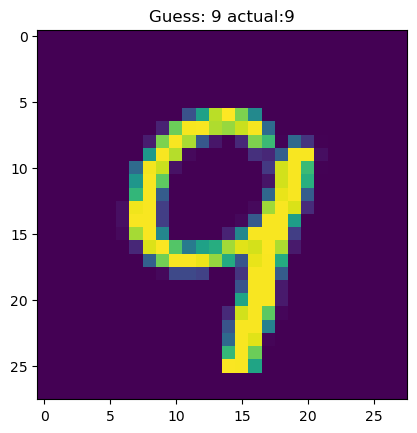

[1.79204637e-03 9.43702536e-04 3.79456944e-03 3.96410533e-02
 2.97540537e-04 8.57163838e-05 2.22983341e-06 9.98202113e-01
 2.11583397e-04 2.56910345e-02] 7


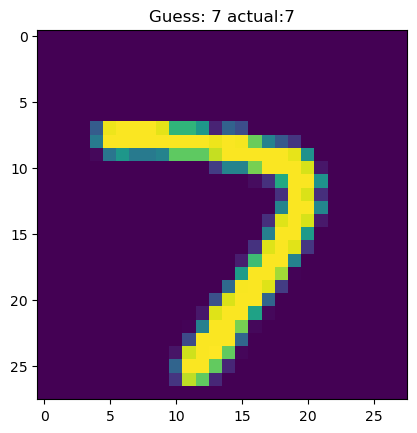

[4.69542080e-04 1.55314703e-03 1.42178746e-03 1.11511799e-01
 3.61096995e-02 1.83659607e-01 7.87073634e-02 2.16787322e-05
 4.63239050e-02 1.33158258e-03] 5


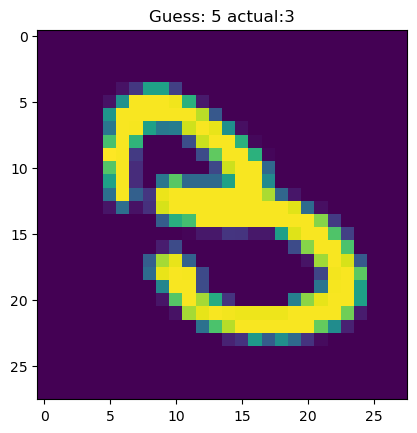

[1.32162725e-04 8.28478707e-04 1.79245582e-04 2.51928954e-03
 9.95873434e-01 5.49131660e-03 8.81016895e-03 2.01116657e-02
 1.29636206e-03 4.24485258e-03] 4


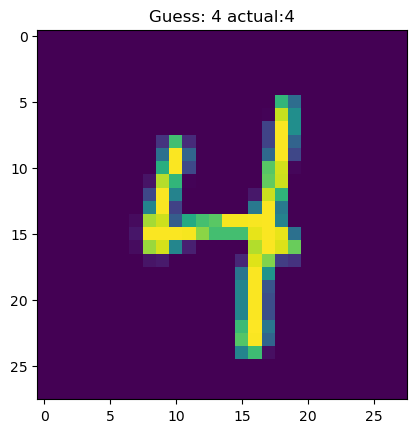

In [36]:
aL_test = nn_mnist_3.forward_prop_set(x_test)
print('For a trained network')
print('Test set probability :', 100*(np.floor( aL_test.T /  aL_test.max(axis = 1)).T * y_test).sum() / len(aL_test), '%')
for i in range(20):
    plt.imshow(x_test[i].reshape(im_width, im_height))
    print(aL_test[i],aL_test[i].argmax() )
    plt.title('Guess: ' + str(aL_test[i].argmax())+  ' actual:'+ str(y_test[i].argmax()))
    plt.show()

In [37]:
nn_mnist_4 = neural_net(0.1, [im_width * im_height,25,10], ['Input', 'tanh', 'softmax'],'log liklihood', 0)

In [38]:
nn_mnist_4.eta = 0.01
L_training, L_testing = nn_mnist_4.stochastic_training(x_train, y_train,x_test, y_test, 10, 600, True)

Batch size =  100
n_batches =  600
Epoch 0 L_testing : 4.068695211322948
Train prob: 63.791666666666664 %. Test prob: 64.3 %
Epoch 1 L_testing : 1.1161902797447418
Train prob: 72.845 %. Test prob: 73.42 %
Epoch 2 L_testing : 0.8349092544490712
Train prob: 76.705 %. Test prob: 77.26 %
Epoch 3 L_testing : 0.7191692053023998
Train prob: 78.85833333333333 %. Test prob: 79.23 %
Epoch 4 L_testing : 0.6532444423937358
Train prob: 80.41833333333334 %. Test prob: 80.76 %
Epoch 5 L_testing : 0.6119581793951665
Train prob: 81.595 %. Test prob: 81.98 %
Epoch 6 L_testing : 0.5812226654617685
Train prob: 82.46833333333333 %. Test prob: 82.89 %
Epoch 7 L_testing : 0.5579040467128766
Train prob: 83.09333333333333 %. Test prob: 83.54 %
Epoch 8 L_testing : 0.5404152090203944
Train prob: 83.67333333333333 %. Test prob: 84.06 %
Epoch 9 L_testing : 0.5258923839445373
Train prob: 84.10666666666667 %. Test prob: 84.35 %


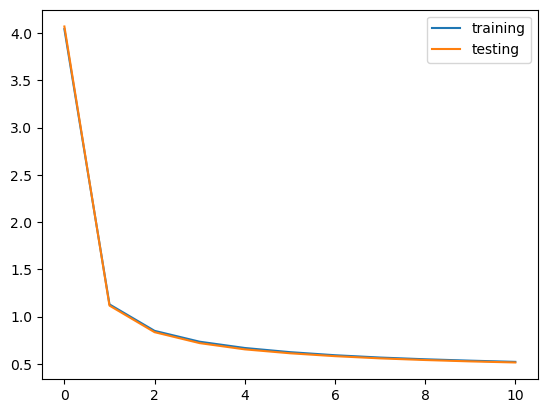

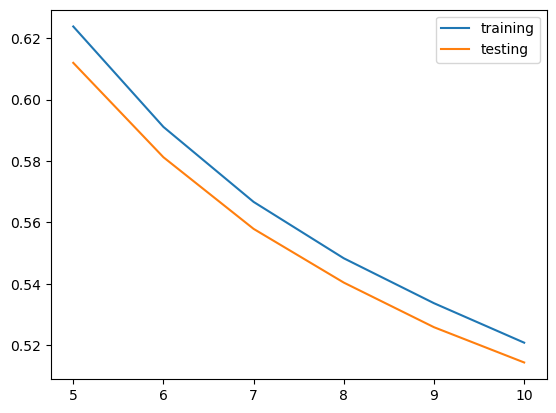

For a trained network
Test set probability : 84.35 %
[1.49471721e-03 1.66041333e-06 1.52742621e-04 2.85654106e-04
 5.90251157e-05 5.36642095e-06 4.32665262e-07 9.94183495e-01
 4.35705869e-04 3.38120093e-03] 7


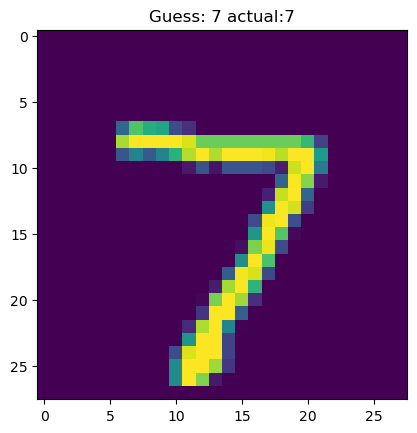

[4.17702833e-02 2.92934611e-02 3.68585680e-01 4.75947332e-02
 1.60945657e-05 1.05114994e-01 3.77641601e-01 1.28233641e-06
 2.99620468e-02 1.98230195e-05] 6


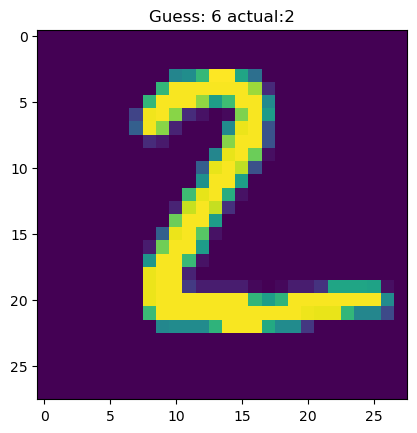

[2.12708693e-06 9.82092012e-01 1.73182321e-03 4.81849882e-03
 4.17816763e-04 4.44310633e-04 1.59564549e-04 3.92603458e-03
 5.60161972e-03 8.06192930e-04] 1


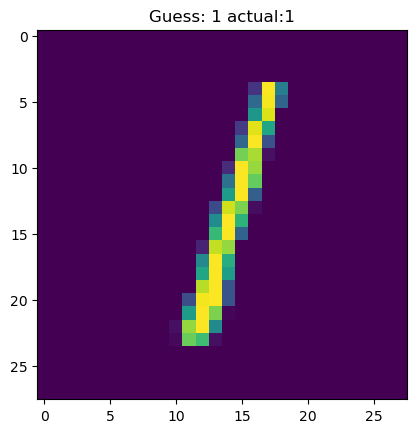

[9.89426608e-01 4.31692110e-06 2.89422338e-03 1.85849438e-04
 2.70356363e-06 5.02315459e-03 9.28580736e-04 2.18533067e-04
 2.15912123e-04 1.10011771e-03] 0


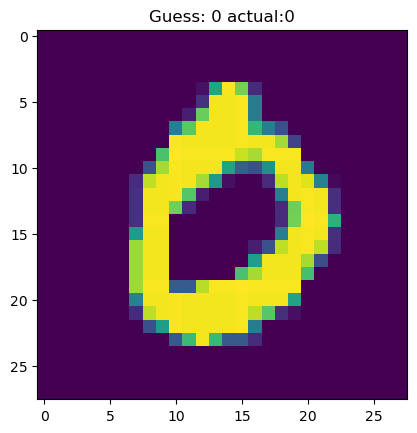

[7.35906865e-04 2.45221909e-07 3.96470352e-03 1.12619775e-04
 9.37801519e-01 3.69038780e-05 2.32990422e-03 1.90593781e-02
 1.83383053e-03 3.41249892e-02] 4


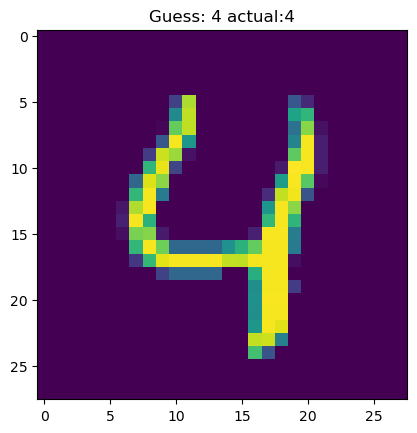

[3.49189678e-06 9.47940240e-01 4.84405830e-03 1.79645895e-02
 1.11272893e-03 1.63255449e-03 4.58741834e-05 1.07989208e-02
 1.38516869e-02 1.80585544e-03] 1


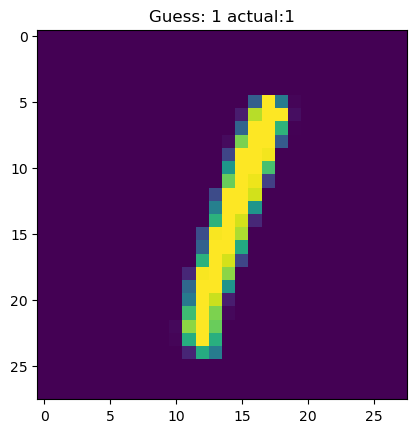

[4.50235366e-03 7.03796578e-06 1.60868971e-04 5.33654337e-02
 6.41541423e-01 1.22067232e-01 1.45356604e-03 2.63112816e-02
 6.27771853e-02 8.78136182e-02] 4


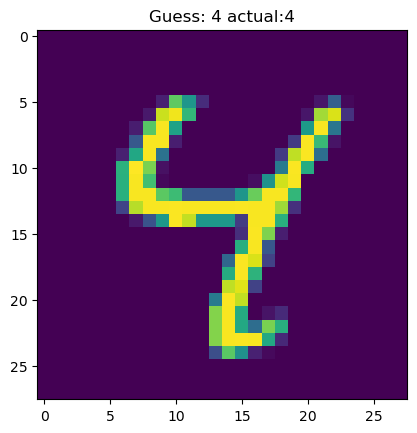

[2.60440252e-06 4.09805653e-03 1.19063544e-03 8.74609631e-04
 2.12277454e-01 3.90773260e-02 1.10660343e-02 4.50578992e-04
 2.93546257e-02 7.01608075e-01] 9


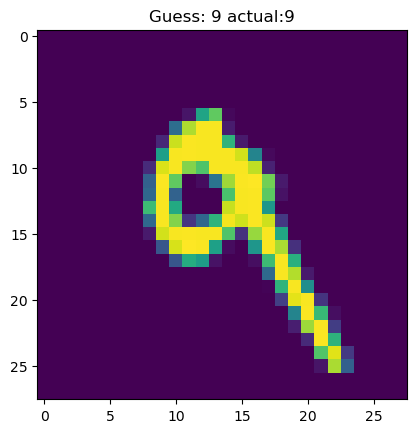

[2.05817289e-01 2.46229711e-04 1.69022072e-01 2.90819140e-03
 1.03396510e-03 3.93974219e-01 1.75310888e-01 1.10192095e-05
 4.86412797e-02 3.03484650e-03] 5


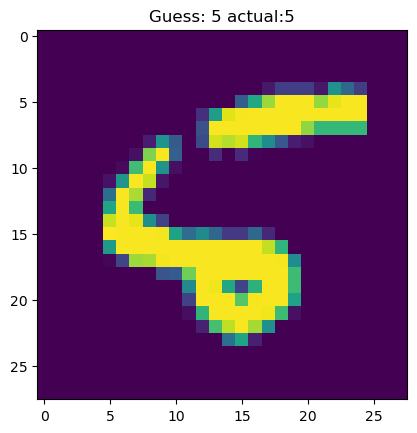

[1.24198408e-04 5.65449295e-06 2.62608003e-06 1.17847534e-04
 7.66819192e-02 2.56778713e-03 7.20085015e-05 1.14343158e-01
 3.87318564e-03 8.02211615e-01] 9


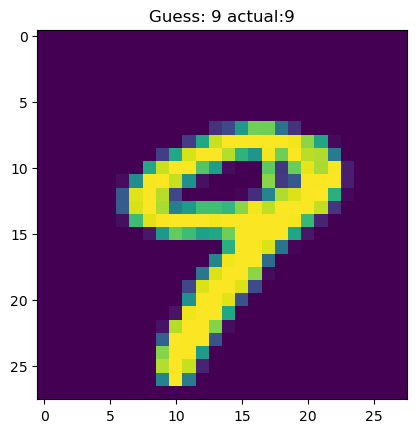

[8.45509674e-01 2.20884524e-05 3.65852265e-03 6.69352372e-04
 1.47105383e-04 1.40294169e-01 8.48479252e-05 9.38912695e-05
 9.39287413e-03 1.27475259e-04] 0


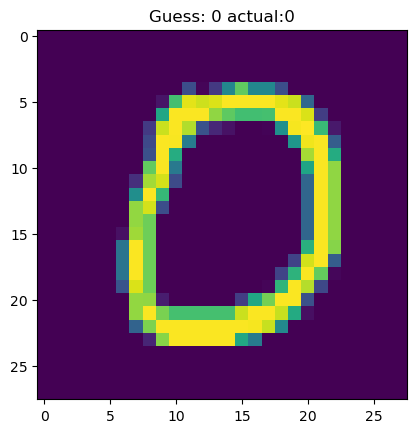

[0.1457108  0.01369956 0.05900785 0.02348403 0.0076793  0.17474154
 0.15838972 0.00142952 0.41355472 0.00230297] 8


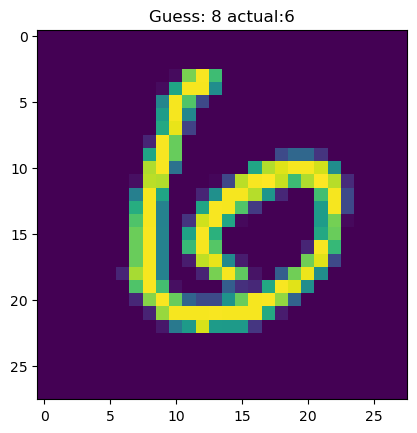

[8.71937667e-04 1.41277690e-06 3.15848925e-05 7.71425030e-05
 1.09351105e-01 8.38925360e-04 9.14679081e-04 2.92464304e-02
 2.92246954e-03 8.55744313e-01] 9


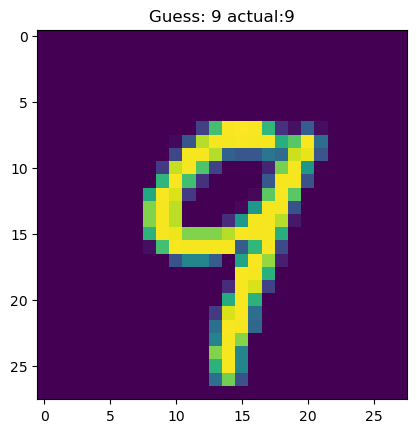

[9.83831895e-01 8.87895069e-06 2.23326155e-03 2.61593365e-04
 8.11786146e-06 9.89325431e-03 1.94973274e-04 5.28826364e-04
 2.57144307e-03 4.67755783e-04] 0


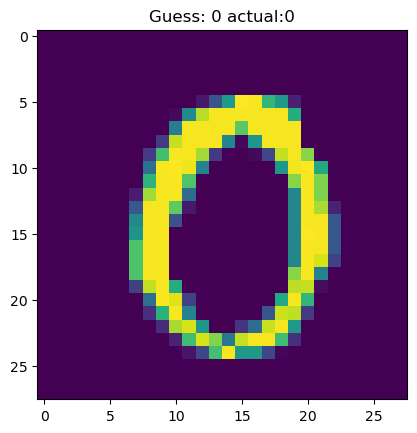

[1.77296070e-06 9.84611833e-01 5.05650088e-04 8.48040043e-03
 4.08593474e-05 6.42369006e-05 9.39202391e-05 4.95981152e-04
 5.31501996e-03 3.90326258e-04] 1


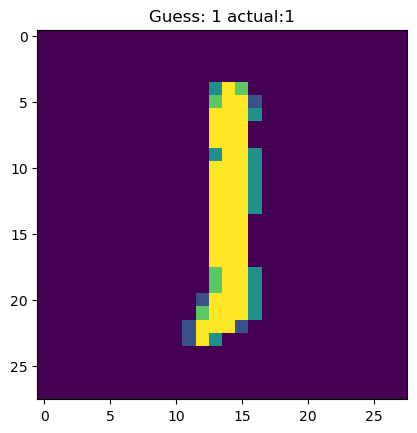

[6.48579022e-02 1.81899948e-03 6.93931817e-04 3.19245913e-01
 2.68077461e-03 3.99298488e-01 1.48447576e-04 3.96729391e-02
 1.69209029e-01 2.37357559e-03] 5


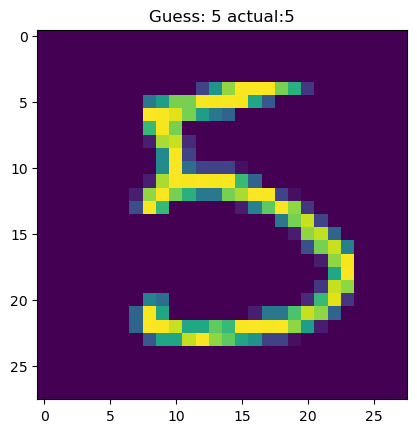

[2.24632353e-05 1.13186208e-05 7.43810704e-04 8.63881373e-05
 1.69623291e-01 4.08893733e-06 8.59159455e-04 2.79073255e-01
 7.89679495e-04 5.48786545e-01] 9


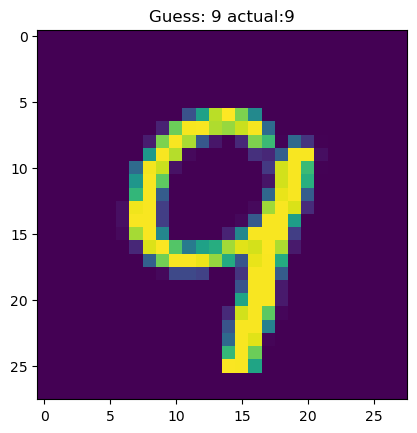

[2.32343865e-03 1.26989195e-06 2.39760245e-05 1.84226691e-03
 2.48339095e-04 1.51687268e-05 1.72568788e-06 9.89206536e-01
 2.26863751e-04 6.11041488e-03] 7


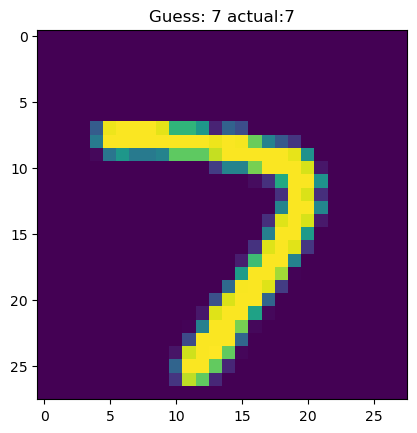

[1.12046667e-02 5.43124094e-05 4.15694941e-02 6.85171343e-01
 2.32690790e-03 8.91270149e-02 5.30142254e-03 2.27386041e-02
 4.83921153e-02 9.41141190e-02] 3


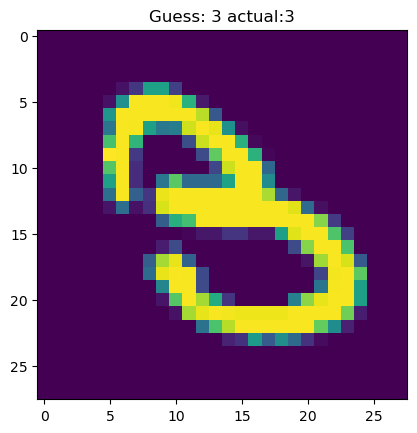

[1.72440917e-06 2.66662769e-05 3.07024312e-04 8.19152087e-05
 9.73435372e-01 1.92507117e-05 2.61629483e-04 1.87793646e-04
 2.51263970e-04 2.54273599e-02] 4


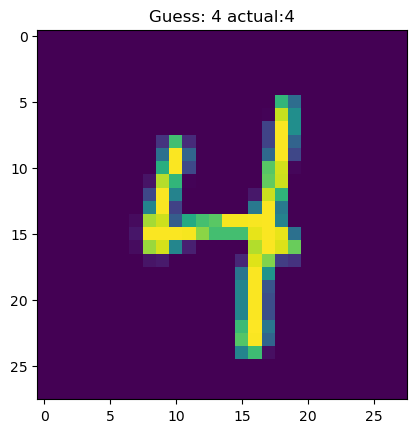

In [39]:
plt.plot(L_training, label = 'training')
plt.plot(L_testing, label = 'testing')
plt.legend()
plt.show()
plt.plot(np.arange(5,len(L_training)),L_training[5:], label = 'training')
plt.plot( np.arange(5,len(L_testing)),L_testing[5:],label = 'testing')
plt.legend()
plt.show()

aL_test = nn_mnist_4.forward_prop_set(x_test)
print('For a trained network')
print('Test set probability :', 100*(np.floor( aL_test.T /  aL_test.max(axis = 1)).T * y_test).sum() / len(aL_test), '%')
for i in range(20):
    plt.imshow(x_test[i].reshape(im_width, im_height))
    print(aL_test[i],aL_test[i].argmax() )
    plt.title('Guess: ' + str(aL_test[i].argmax())+  ' actual:'+ str(y_test[i].argmax()))
    plt.show()

# Using keras to show my code is bad

In [60]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [61]:
model = Sequential()
model.add(Dense(30,input_shape=(im_width * im_height,), activation='relu'))
model.add(Dense(10, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [62]:
history = model.fit(x_train, y_train, validation_split=0.2,epochs=150, batch_size=600)

Epoch 1/150
80/80 [==============================] - 1s 5ms/step - loss: 0.3285 - accuracy: 0.4278 - val_loss: 0.2107 - val_accuracy: 0.7731
Epoch 2/150
80/80 [==============================] - 0s 4ms/step - loss: 0.1723 - accuracy: 0.7995 - val_loss: 0.1326 - val_accuracy: 0.8566
Epoch 3/150
80/80 [==============================] - 0s 4ms/step - loss: 0.1205 - accuracy: 0.8541 - val_loss: 0.1021 - val_accuracy: 0.8806
Epoch 4/150
80/80 [==============================] - 0s 4ms/step - loss: 0.0989 - accuracy: 0.8751 - val_loss: 0.0874 - val_accuracy: 0.8933
Epoch 5/150
80/80 [==============================] - 0s 4ms/step - loss: 0.0869 - accuracy: 0.8878 - val_loss: 0.0783 - val_accuracy: 0.9028
Epoch 6/150
80/80 [==============================] - 0s 3ms/step - loss: 0.0784 - accuracy: 0.8982 - val_loss: 0.0709 - val_accuracy: 0.9103
Epoch 7/150
80/80 [==============================] - 0s 3ms/step - loss: 0.0705 - accuracy: 0.9079 - val_loss: 0.0642 - val_accuracy: 0.9195
Epoch 8/150
8

Epoch 59/150
80/80 [==============================] - 0s 4ms/step - loss: 0.0204 - accuracy: 0.9755 - val_loss: 0.0279 - val_accuracy: 0.9632
Epoch 60/150
80/80 [==============================] - 0s 4ms/step - loss: 0.0202 - accuracy: 0.9756 - val_loss: 0.0280 - val_accuracy: 0.9634
Epoch 61/150
80/80 [==============================] - 0s 4ms/step - loss: 0.0199 - accuracy: 0.9759 - val_loss: 0.0279 - val_accuracy: 0.9627
Epoch 62/150
80/80 [==============================] - 0s 3ms/step - loss: 0.0196 - accuracy: 0.9769 - val_loss: 0.0280 - val_accuracy: 0.9618
Epoch 63/150
80/80 [==============================] - 0s 4ms/step - loss: 0.0194 - accuracy: 0.9771 - val_loss: 0.0277 - val_accuracy: 0.9640
Epoch 64/150
80/80 [==============================] - 0s 4ms/step - loss: 0.0192 - accuracy: 0.9770 - val_loss: 0.0281 - val_accuracy: 0.9622
Epoch 65/150
80/80 [==============================] - 0s 3ms/step - loss: 0.0190 - accuracy: 0.9776 - val_loss: 0.0276 - val_accuracy: 0.9636
Epoch 

80/80 [==============================] - 0s 4ms/step - loss: 0.0122 - accuracy: 0.9874 - val_loss: 0.0290 - val_accuracy: 0.9662
Epoch 117/150
80/80 [==============================] - 0s 4ms/step - loss: 0.0121 - accuracy: 0.9878 - val_loss: 0.0289 - val_accuracy: 0.9657
Epoch 118/150
80/80 [==============================] - 0s 4ms/step - loss: 0.0120 - accuracy: 0.9879 - val_loss: 0.0290 - val_accuracy: 0.9657
Epoch 119/150
80/80 [==============================] - 0s 3ms/step - loss: 0.0119 - accuracy: 0.9880 - val_loss: 0.0291 - val_accuracy: 0.9654
Epoch 120/150
80/80 [==============================] - 0s 3ms/step - loss: 0.0118 - accuracy: 0.9884 - val_loss: 0.0289 - val_accuracy: 0.9657
Epoch 121/150
80/80 [==============================] - 0s 3ms/step - loss: 0.0117 - accuracy: 0.9885 - val_loss: 0.0290 - val_accuracy: 0.9657
Epoch 122/150
80/80 [==============================] - 0s 3ms/step - loss: 0.0117 - accuracy: 0.9883 - val_loss: 0.0291 - val_accuracy: 0.9667
Epoch 123/150

In [71]:
loss, accuracy = model.evaluate(x_test, y_test)
aL_test = model.predict(x_test)

print('Accuracy: %.2f' % (accuracy*100))

313/313 [==============================] - 0s 1ms/step
Accuracy: 96.58


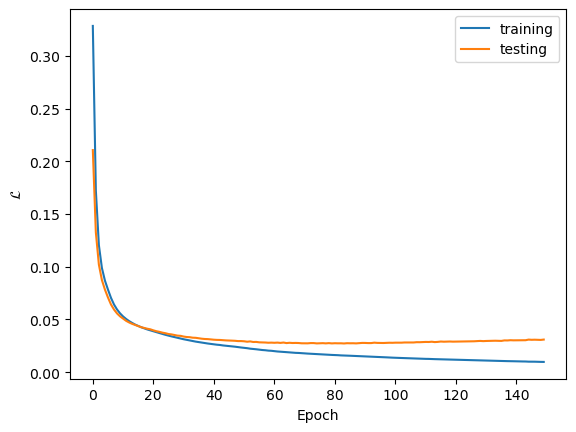

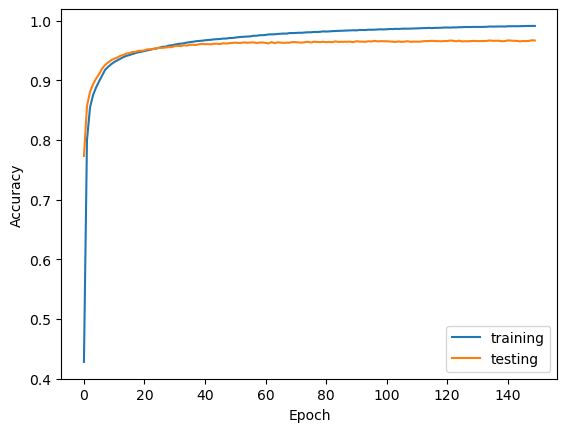

For a trained network
Test set probability : 96.58 %
[6.48266507e-07 3.98108022e-12 1.00442726e-07 3.07040318e-04
 1.35836176e-09 4.17578747e-07 3.65830521e-13 9.99968648e-01
 1.70552306e-09 1.67285089e-06] 7


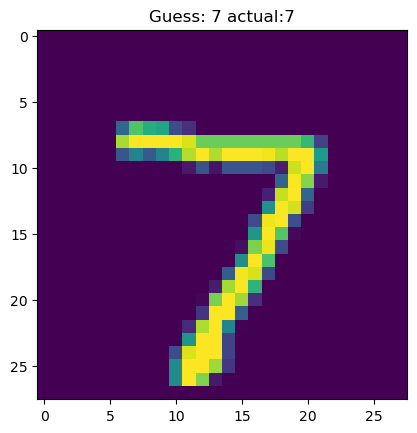

[3.1259398e-10 2.6972748e-07 9.9995685e-01 8.1669924e-09 1.4036493e-18
 2.8367408e-06 1.0534247e-10 9.1110168e-22 1.4617223e-12 6.2674279e-21] 2


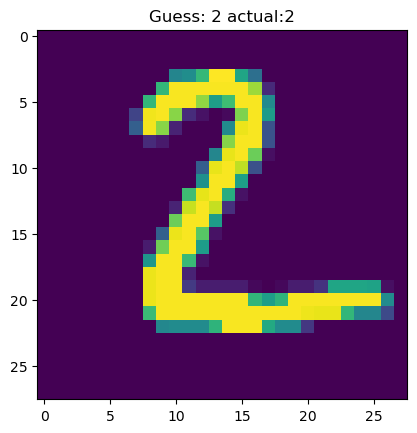

[1.2889417e-07 9.9215591e-01 1.6442172e-03 2.6029468e-06 1.1397275e-05
 7.0598608e-06 1.2798236e-05 7.0078429e-05 1.5089206e-03 6.0058944e-08] 1


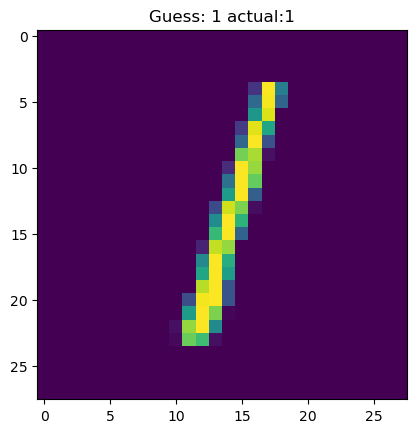

[9.99999046e-01 1.27931357e-13 2.81575267e-05 1.02461745e-05
 4.95633227e-04 3.37870042e-05 4.75136585e-05 1.91530460e-04
 3.17923049e-11 3.39468875e-06] 0


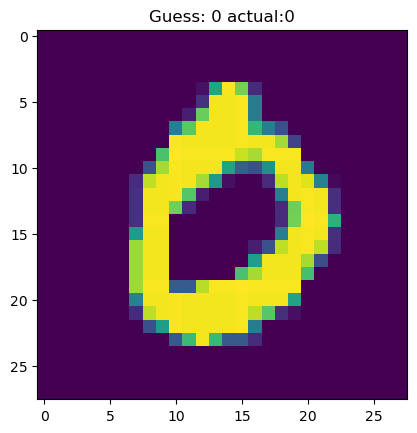

[1.1832716e-06 8.2855776e-13 9.9874851e-06 3.8130660e-05 9.9985743e-01
 4.5207037e-07 2.7780196e-05 6.9579057e-04 2.7812694e-04 3.8644960e-03] 4


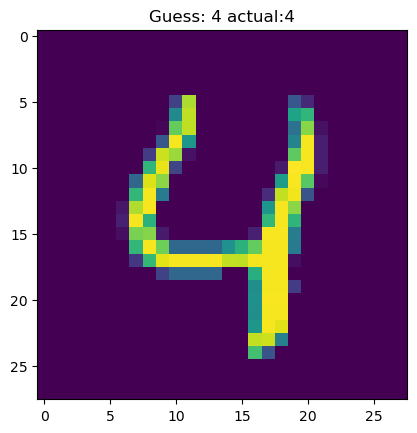

[5.4850540e-07 9.9923331e-01 7.4923501e-06 8.1092672e-05 1.6980905e-05
 1.1625406e-08 6.4990382e-07 5.1727840e-03 8.1682971e-05 4.2776229e-08] 1


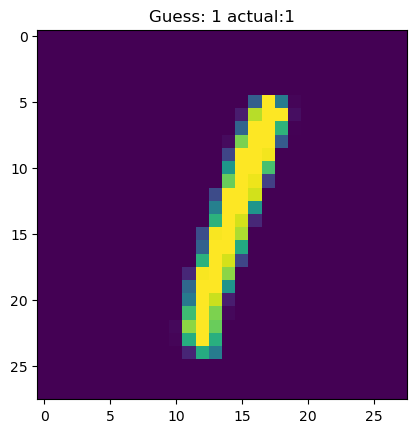

[2.0730238e-10 4.4357563e-08 6.6823453e-08 9.0513896e-07 9.9633592e-01
 3.9844877e-10 5.5637932e-11 1.2112927e-03 1.5137547e-03 2.7479191e-04] 4


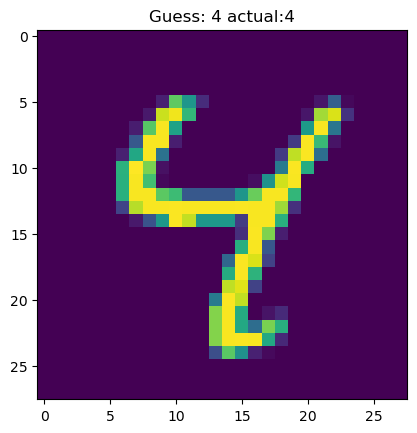

[2.1417774e-09 5.0077080e-09 2.9910661e-04 3.6028730e-06 1.8042587e-06
 2.2063944e-03 8.7958112e-09 1.0337685e-07 1.3735843e-10 9.9991345e-01] 9


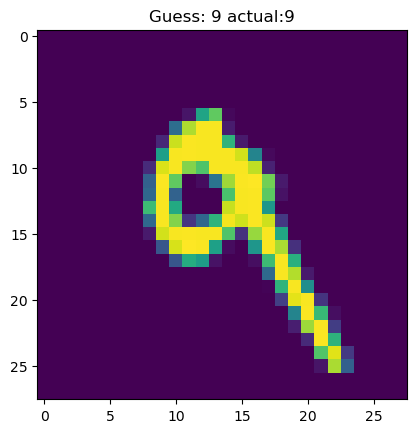

[1.0003967e-15 2.1444144e-12 5.8332780e-06 1.5450389e-11 1.4672804e-09
 1.6140096e-01 8.0292746e-03 6.2759640e-15 1.0158487e-03 6.0372084e-14] 5


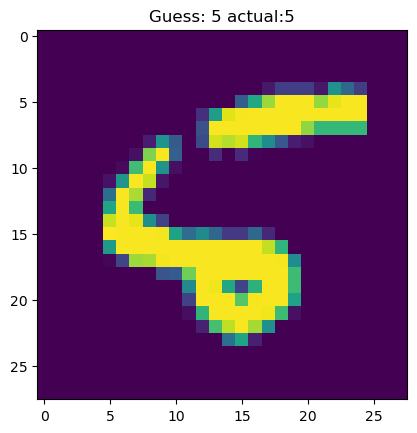

[8.0114537e-10 1.6007063e-20 1.3261317e-12 4.8120444e-07 1.3106891e-04
 3.1539647e-12 4.8022194e-08 8.0654360e-03 1.2672473e-07 9.9859214e-01] 9


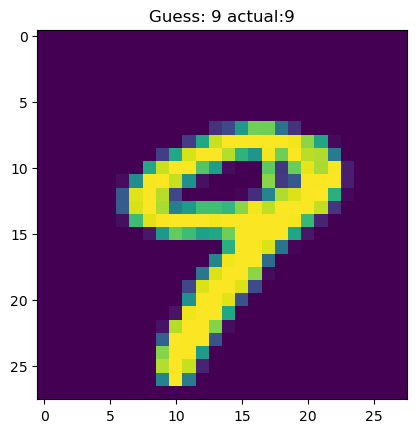

[9.9977440e-01 1.3189500e-12 3.7923869e-04 3.4979609e-04 2.2982782e-09
 4.2114876e-05 4.7152735e-06 8.0787448e-09 1.5864751e-07 1.8440900e-08] 0


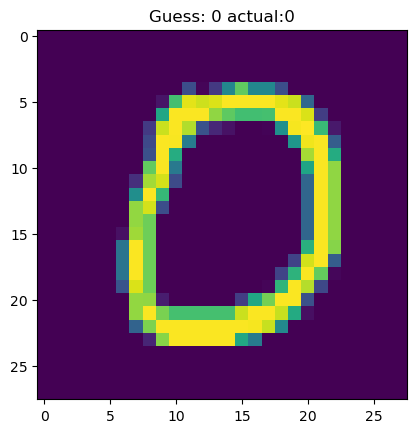

[5.53625932e-06 7.19017554e-11 3.61058992e-05 4.18185982e-06
 1.16159198e-08 3.58809018e-08 9.99806285e-01 1.13101584e-10
 8.89564035e-05 3.60276387e-09] 6


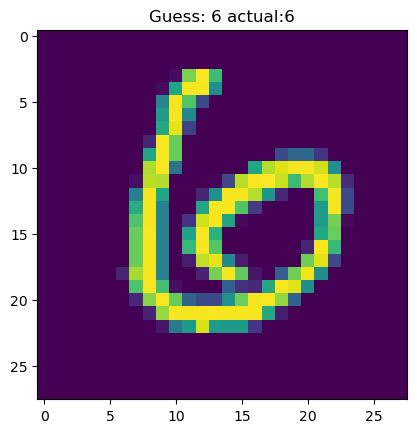

[9.1634487e-09 1.9605965e-14 2.3562876e-09 1.1250733e-02 1.5700894e-05
 3.9936602e-08 1.8237504e-11 1.2296913e-04 3.8417761e-06 9.9991113e-01] 9


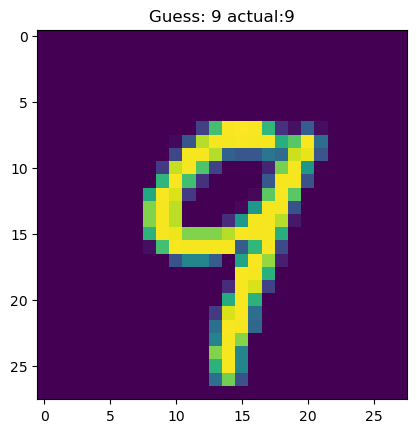

[9.9993873e-01 4.9398875e-13 1.1904669e-06 7.1673784e-03 3.3700469e-04
 2.6045311e-05 7.4640739e-05 9.5146132e-04 6.6926812e-05 4.1393121e-04] 0


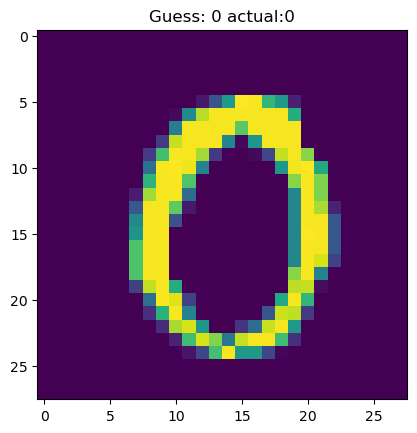

[1.4806271e-11 9.9996686e-01 7.0283189e-11 9.8626991e-04 1.9611679e-07
 5.3754821e-08 2.5396929e-07 7.8699338e-07 3.7880188e-06 1.9192553e-08] 1


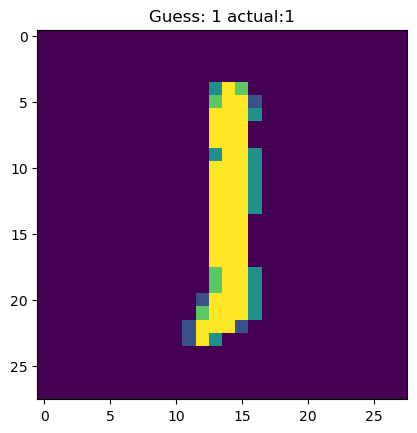

[6.2094858e-07 4.4992642e-04 6.9585394e-07 1.2235084e-02 2.5266875e-10
 9.8646373e-01 3.9251880e-08 5.2417523e-12 1.2163755e-04 6.9043938e-07] 5


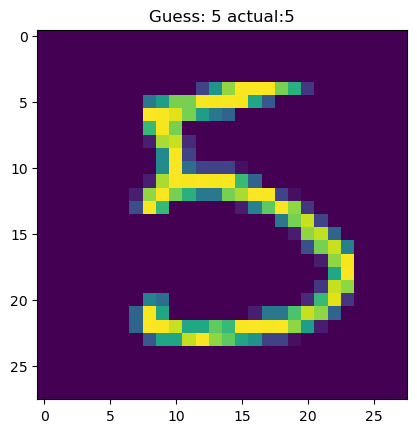

[2.2832430e-07 2.1463949e-16 2.3035456e-08 1.7648932e-03 1.3143540e-03
 2.9844742e-08 2.4729195e-07 4.6696558e-04 3.3185960e-04 9.9921489e-01] 9


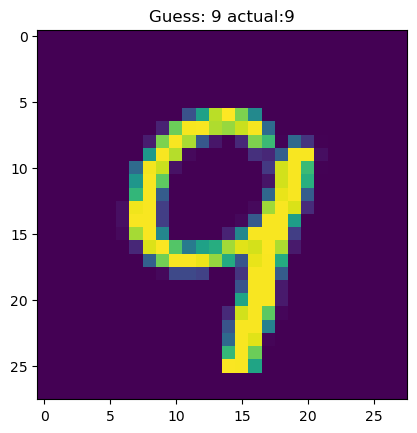

[2.3029497e-06 1.5680197e-12 6.9796074e-06 3.4928031e-05 2.5716403e-11
 2.1902034e-08 2.0548903e-15 9.9997890e-01 2.4075434e-11 1.3118293e-09] 7


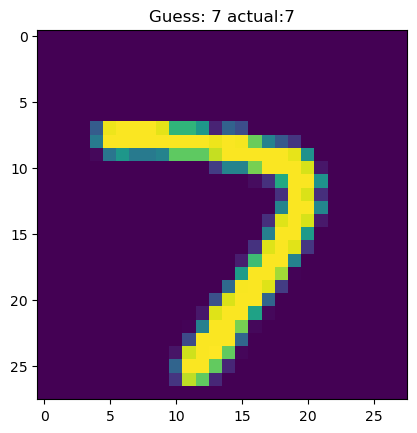

[4.3200857e-06 4.3188311e-07 1.8548474e-06 9.9946314e-01 3.6893678e-06
 2.2678993e-05 2.1692834e-07 4.6112949e-12 1.2875609e-01 4.7398307e-06] 3


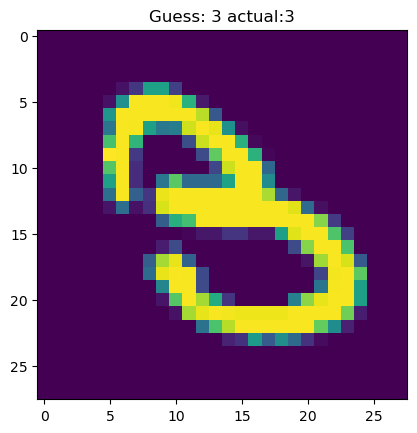

[4.0835118e-08 1.3775430e-06 3.0052580e-04 9.6491813e-06 9.9995297e-01
 3.4743158e-07 9.2818508e-09 3.9368705e-04 2.8319599e-07 7.1902701e-05] 4


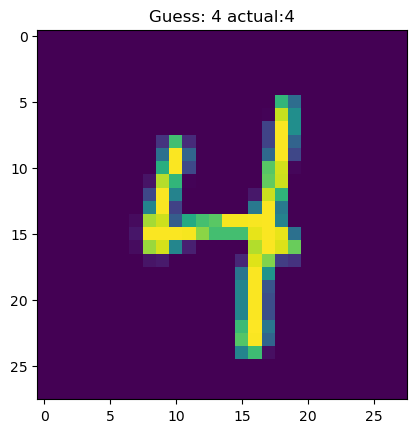

In [72]:
plt.plot(history.history['loss'], label = 'training')
plt.plot(history.history['val_loss'], label = 'testing')
plt.xlabel('Epoch')
plt.ylabel('$\mathcal{L}$')
plt.legend()
plt.show()
plt.plot(history.history['accuracy'], label = 'training')
plt.plot(history.history['val_accuracy'], label = 'testing')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
print('For a trained network')
print('Test set probability :', 100*(np.floor( aL_test.T /  aL_test.max(axis = 1)).T * y_test).sum() / len(aL_test), '%')
for i in range(20):
    plt.imshow(x_test[i].reshape(im_width, im_height))
    print(aL_test[i],aL_test[i].argmax() )
    plt.title('Guess: ' + str(aL_test[i].argmax())+  ' actual:'+ str(y_test[i].argmax()))
    plt.show()